
# <center> Basic Regression Analysis on House Price </center>

A look at using different cleaning and analysis techniques to solve a regression problem. Given the feature available in the dataset, train your model and predict the sales price for the events, given the tset data valiable.

Data Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [1]:
# Importing Libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns

from pylab import rcParams
from tqdm import tqdm

# Set plotting format
#plt.rcParams['figure.figsize'] = (30,20)
%config InlineBackend.figure_format = 'retina'

# Disable notebook warnings
warnings.filterwarnings('ignore')


# Setting Dataframe format
pd.set_option('display.max_columns',1000)
#pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option('precision',2)
sns.set()

### Importing Data

In [2]:
sample = pd.read_csv('https://www.dropbox.com/s/sqododf4xccjz00/sample_submission.csv?dl=1', sep=',')
sample.head()

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


In [3]:
test_data =  pd.read_csv('https://www.dropbox.com/s/zzw1sr1jzw6s00i/test.csv?dl=1', sep=',')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_data = pd.read_csv('https://www.dropbox.com/s/z65tkd846miq3b4/train.csv?dl=1', sep=',')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# <center>Understanding Feature</center>

In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
for c in train_data.columns:
    print(train_data[c].name + str(' Value Counts:'))
    print(train_data[c].value_counts())
    print('\n\n')

Id Value Counts:
1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64



MSSubClass Value Counts:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64



MSZoning Value Counts:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: 

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
quant_features = list()
cat_features = list()
for c in train_data.columns:
    if ((train_data[c].dtype == np.int64) | (train_data[c].dtype ==  np.float64)):
        quant_features.append(c)
    else:
        cat_features.append(c)
print(quant_features), print(), print(cat_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

(None, None, None)

100%|██████████| 43/43 [00:02<00:00, 16.63it/s]


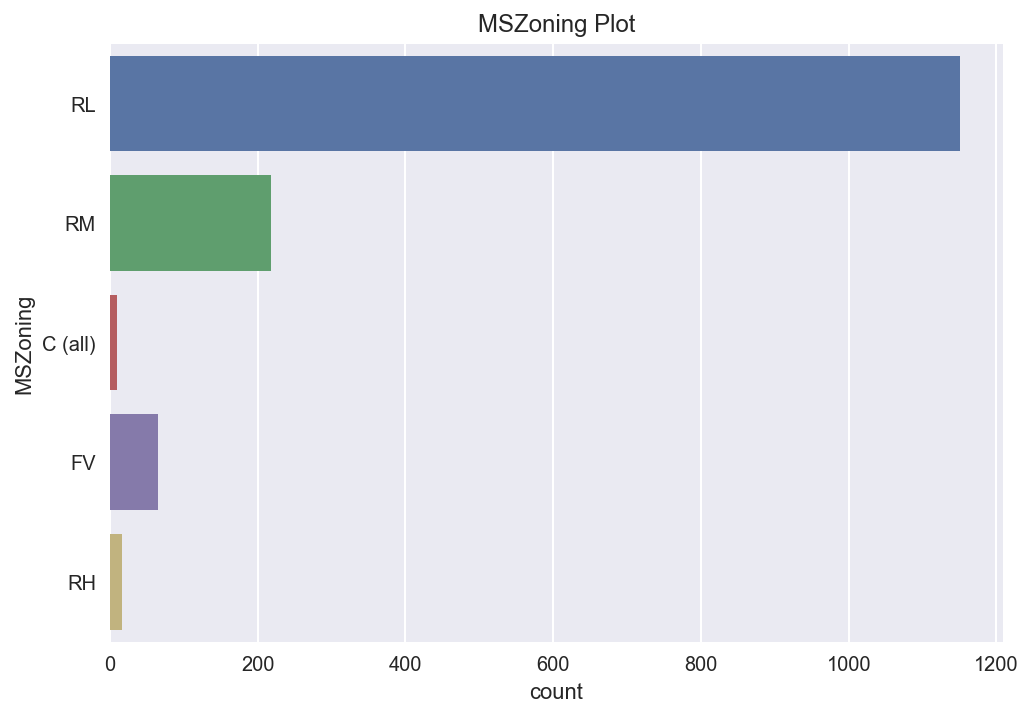

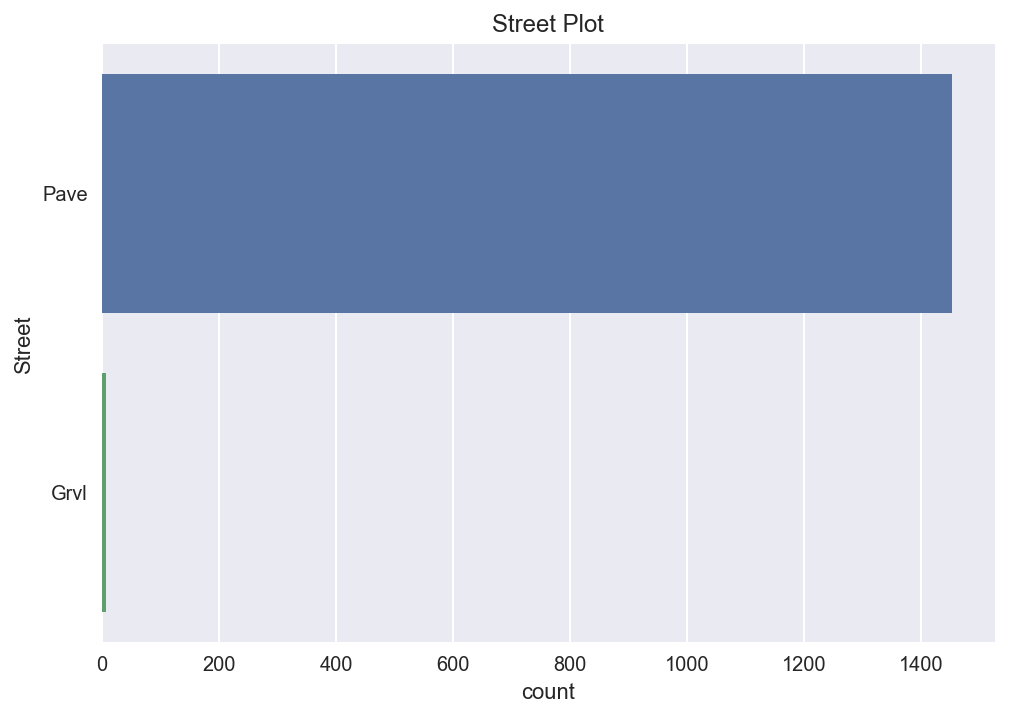

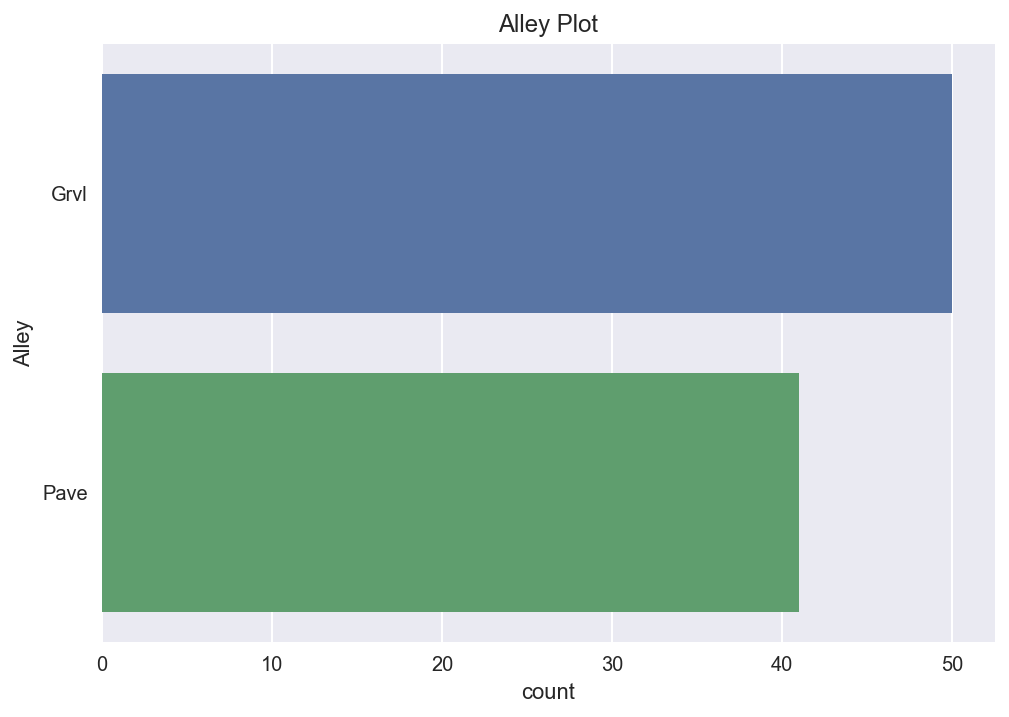

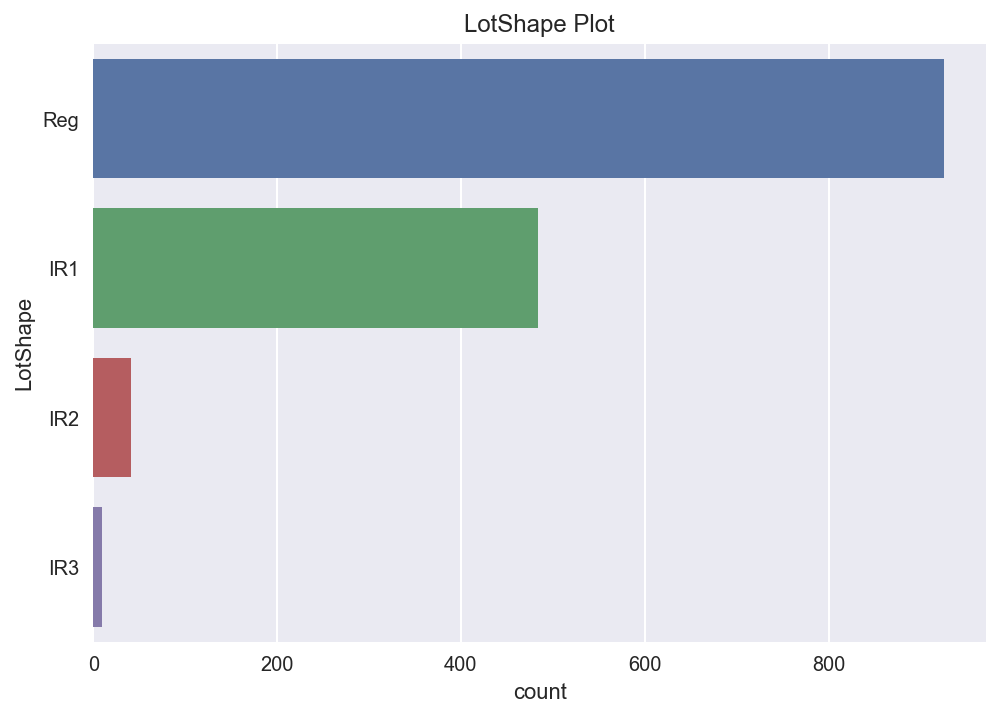

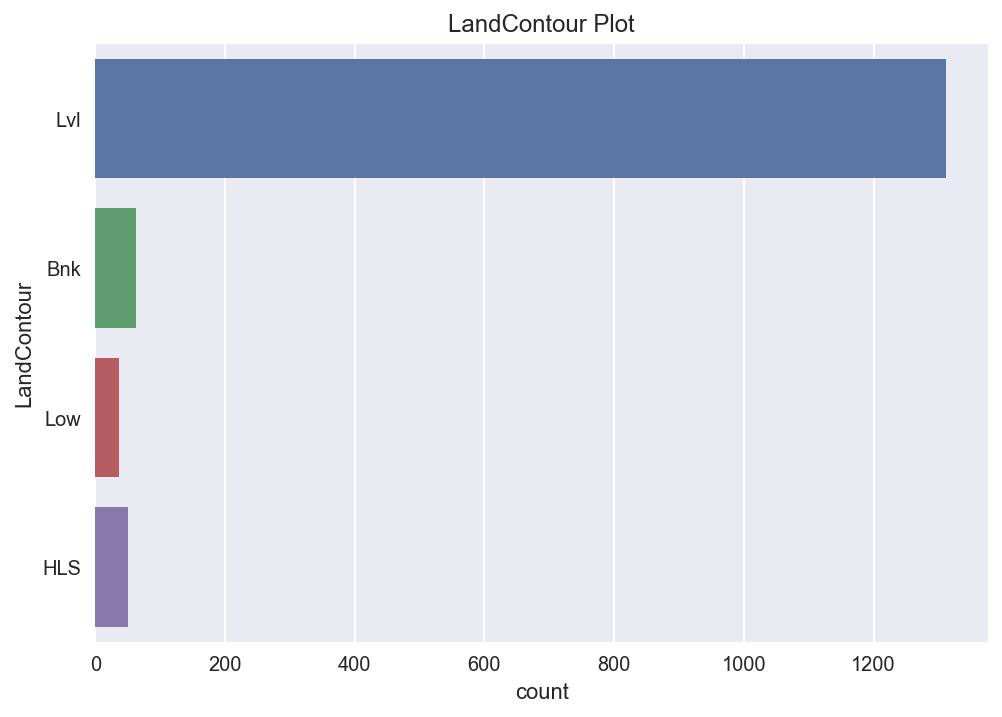

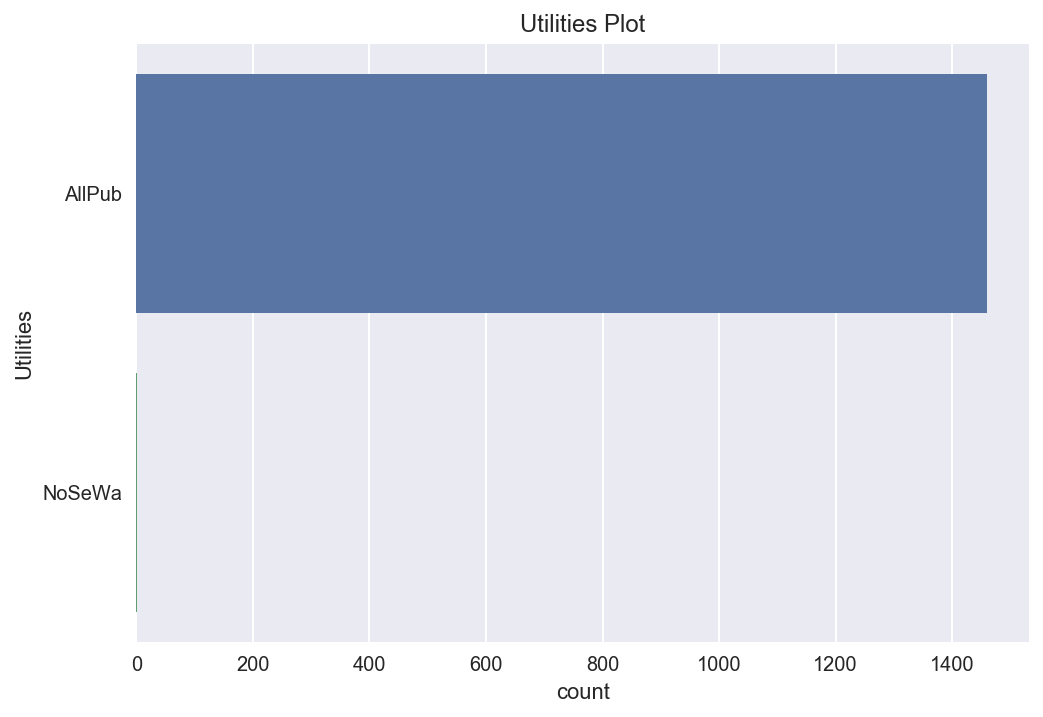

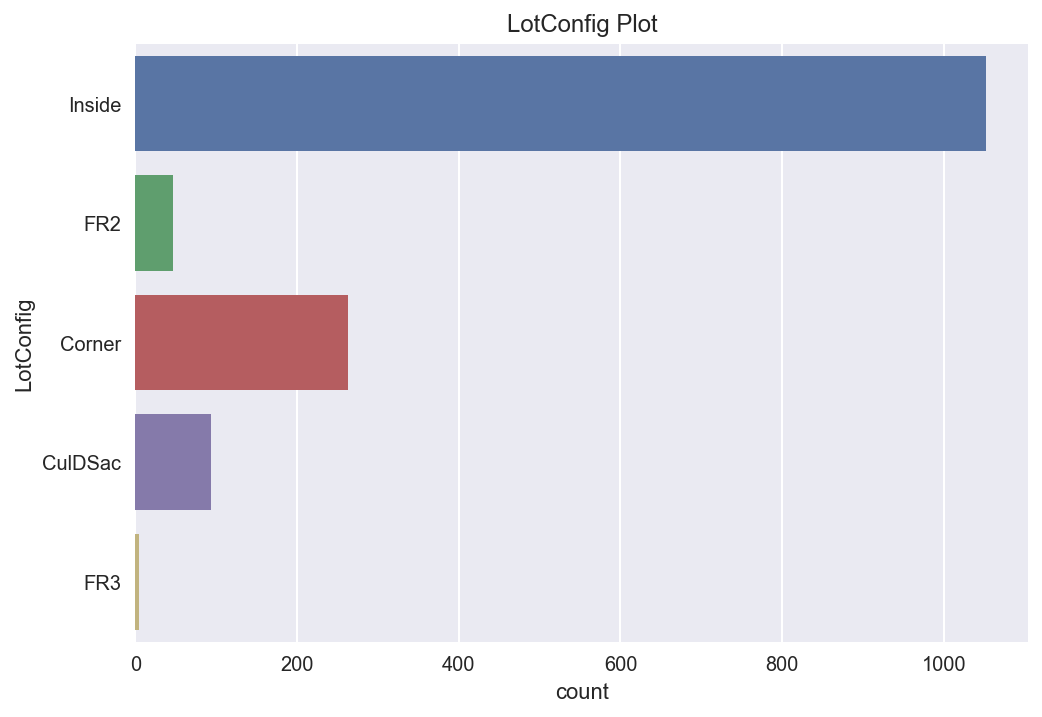

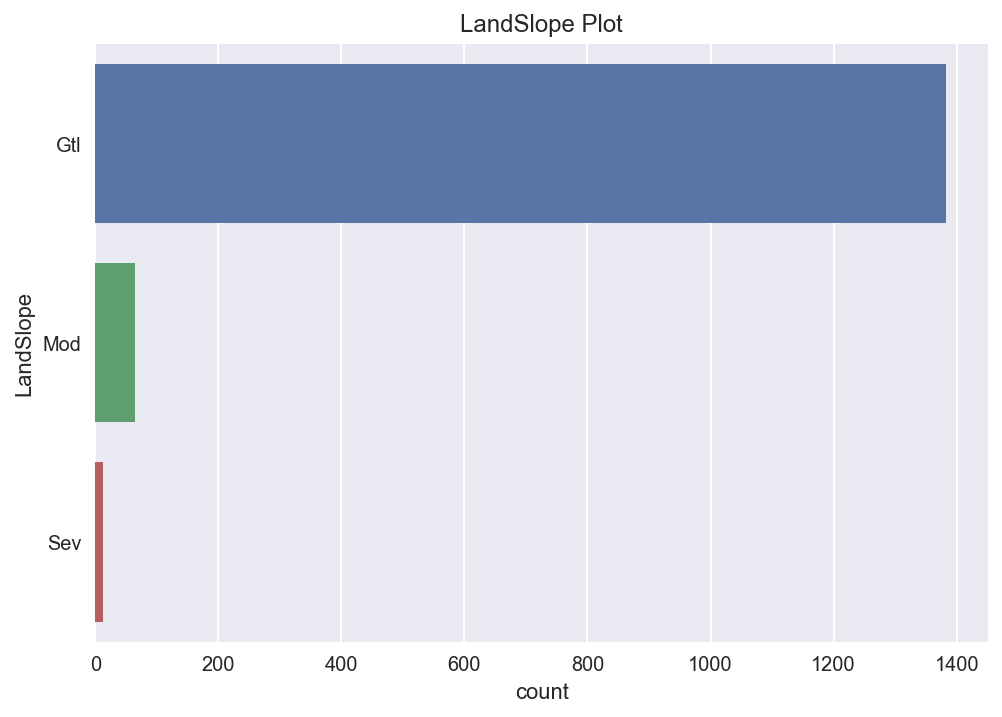

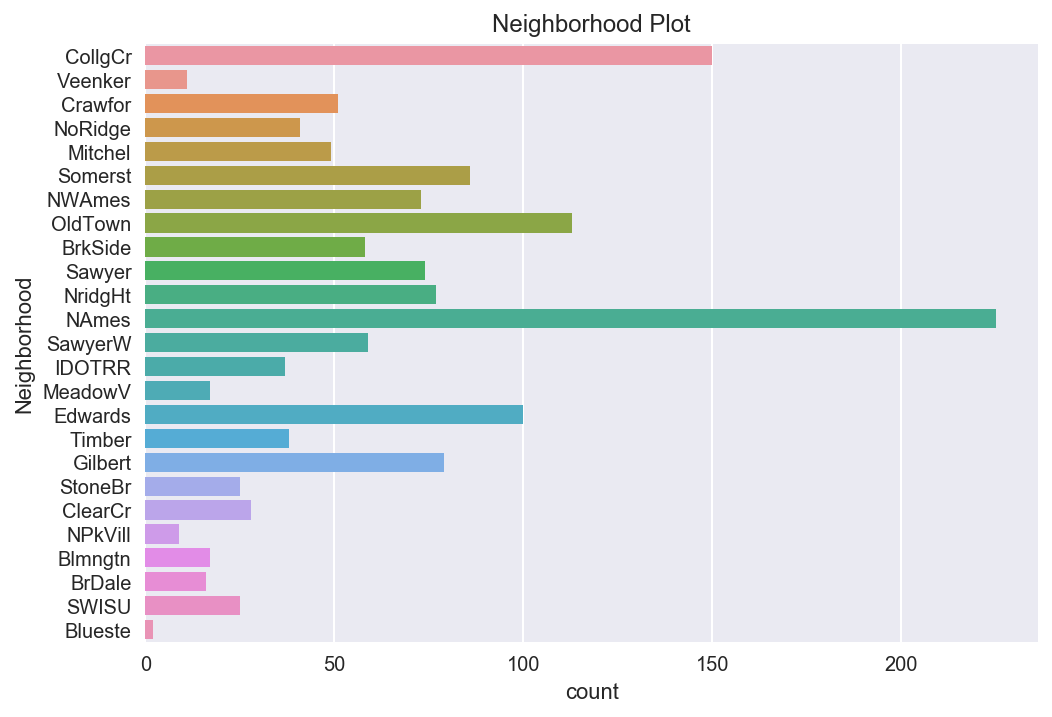

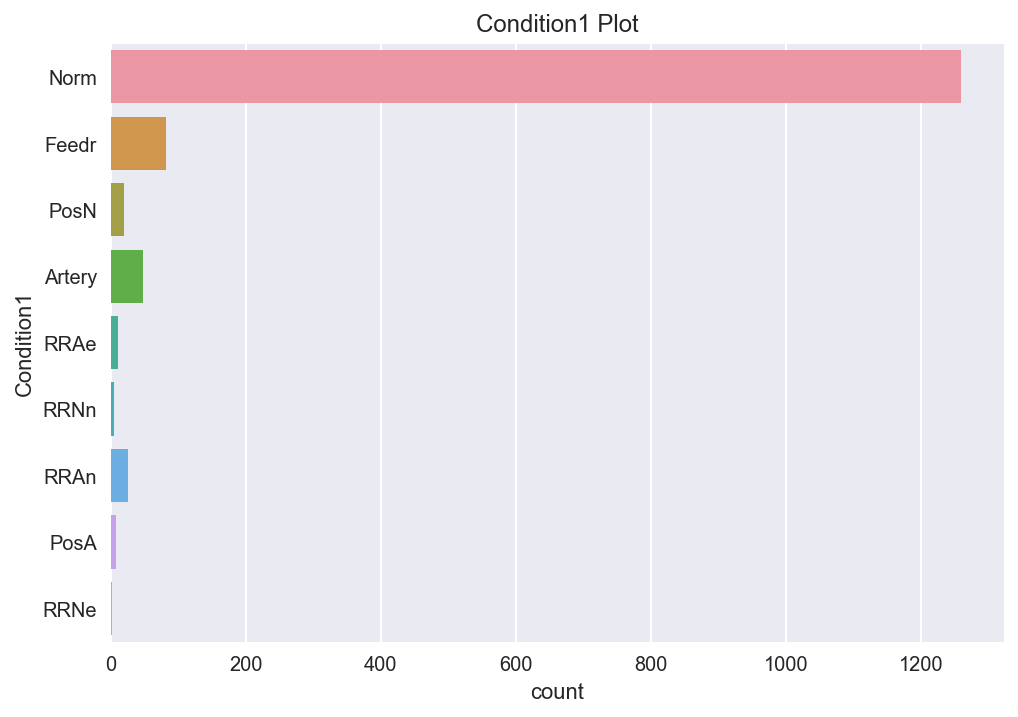

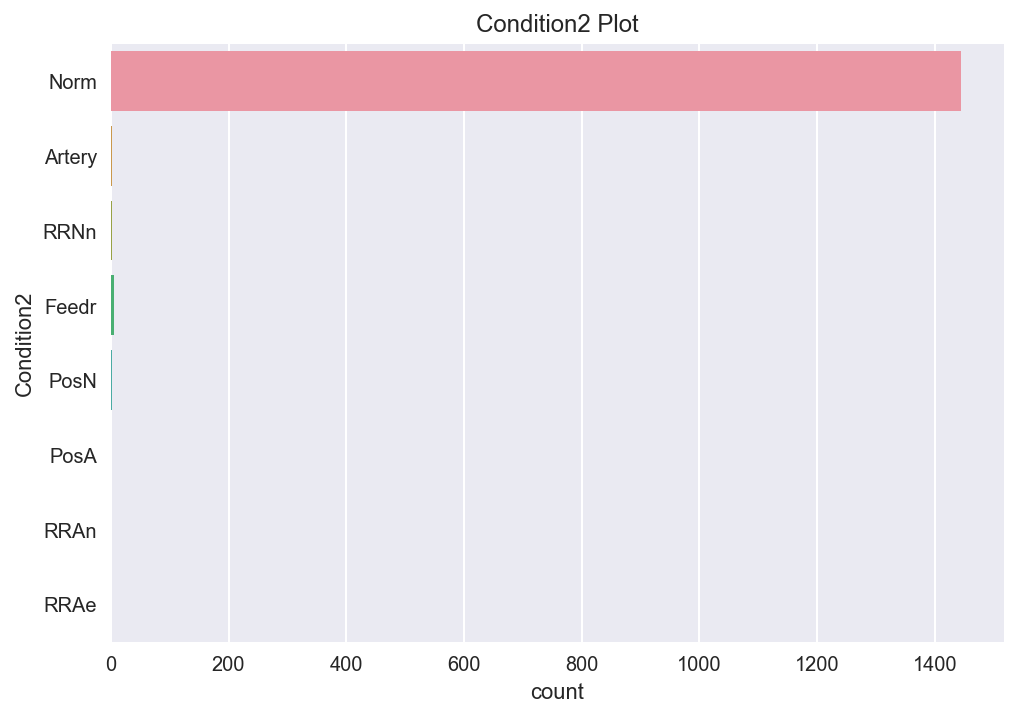

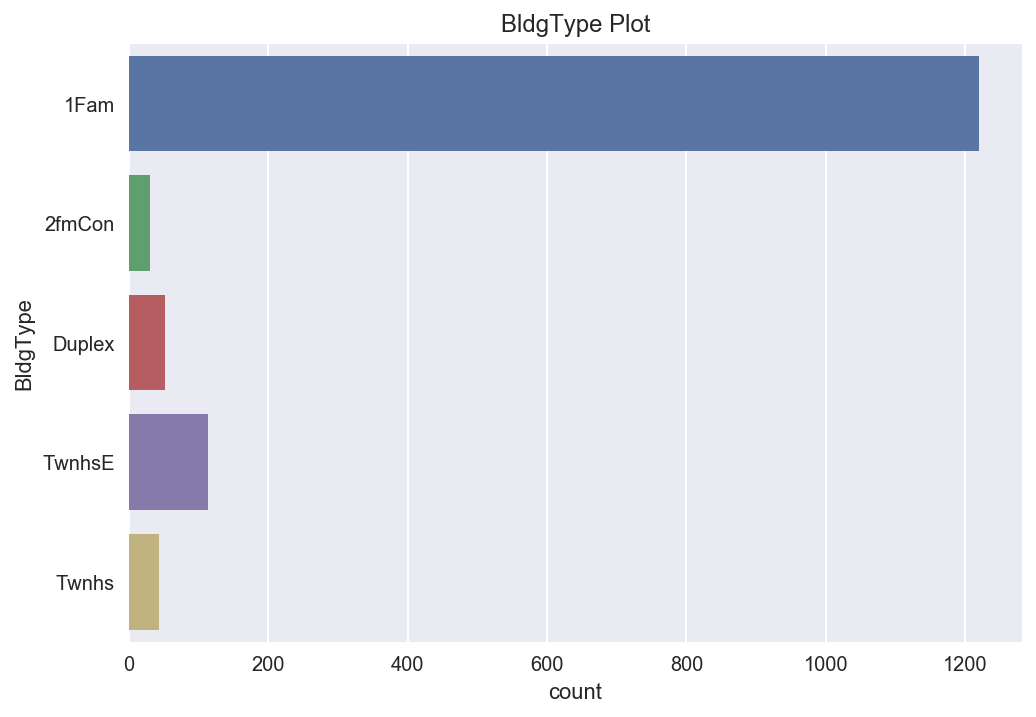

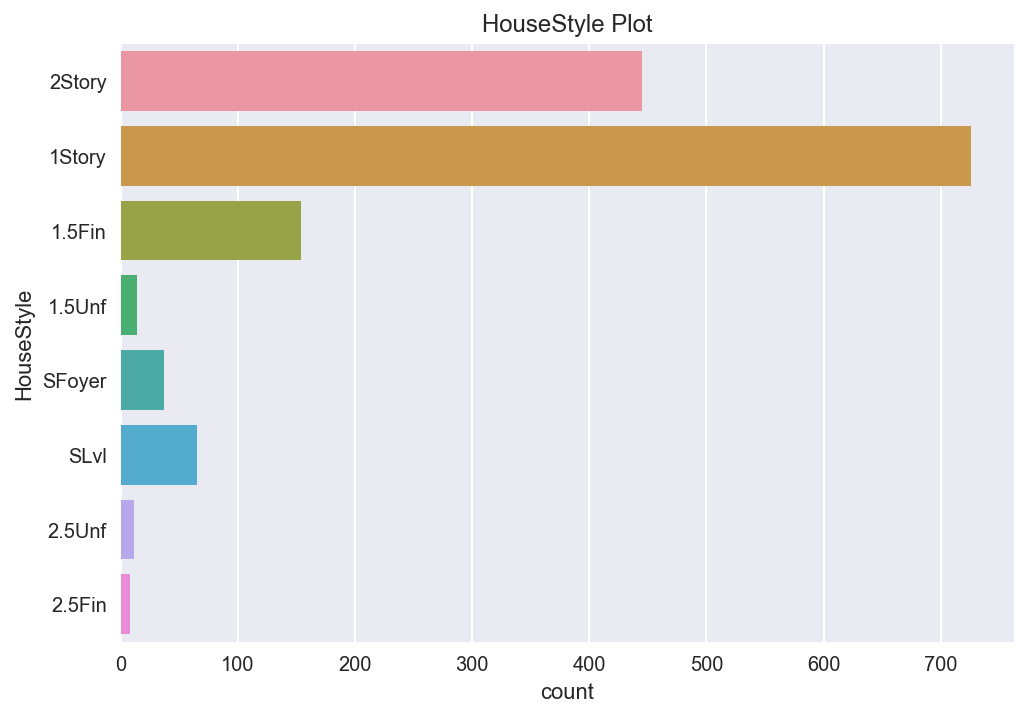

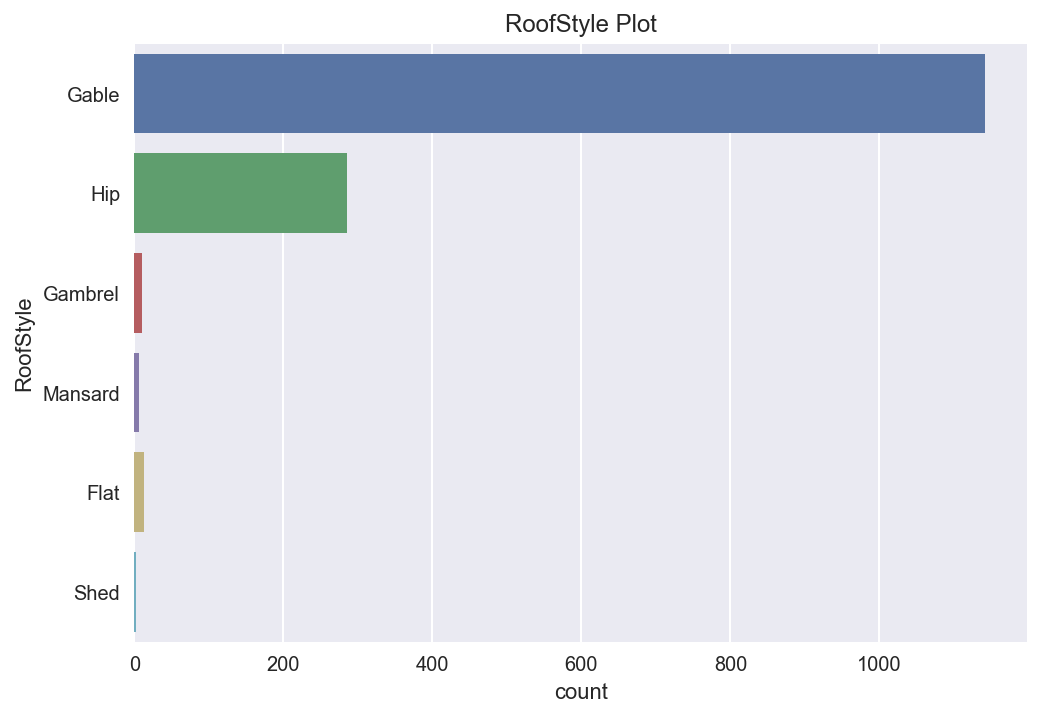

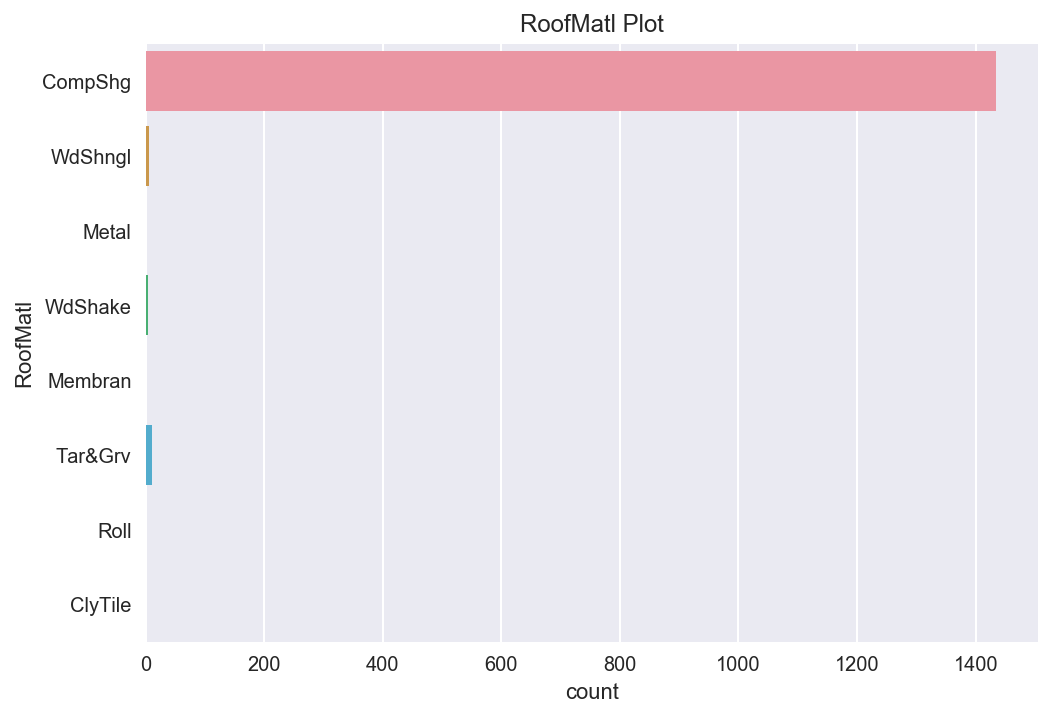

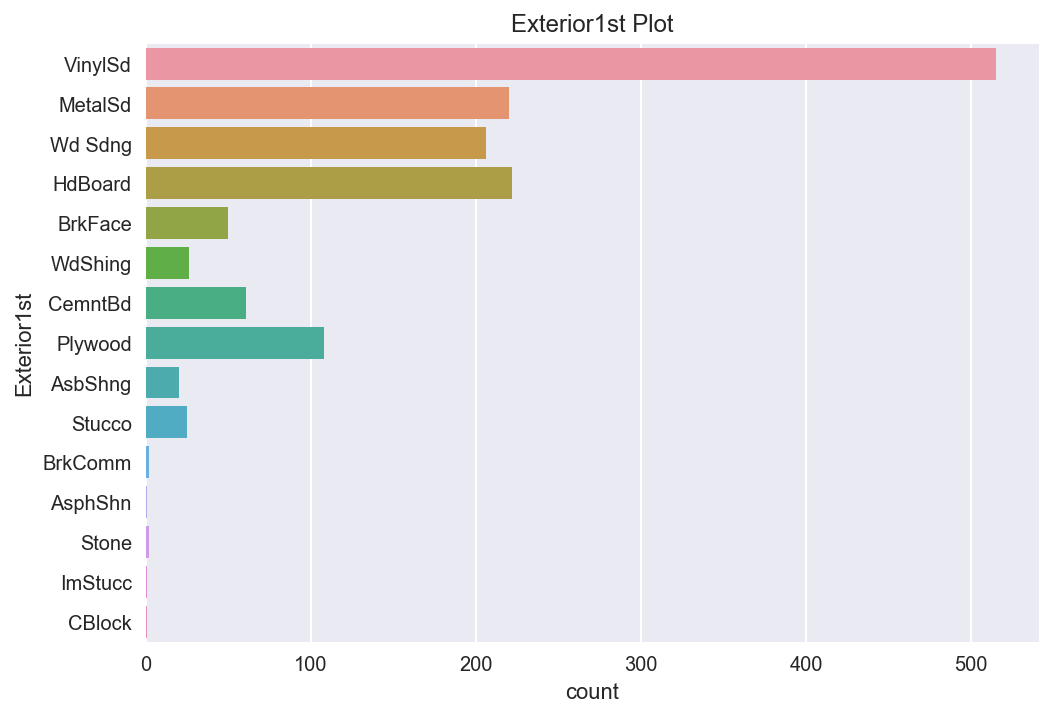

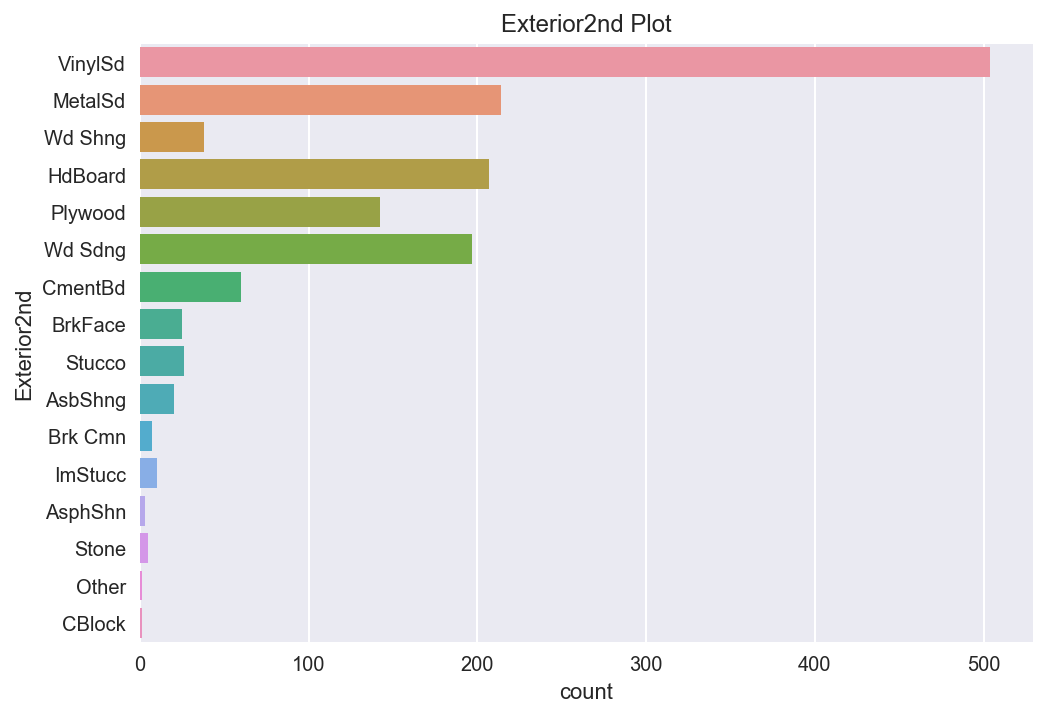

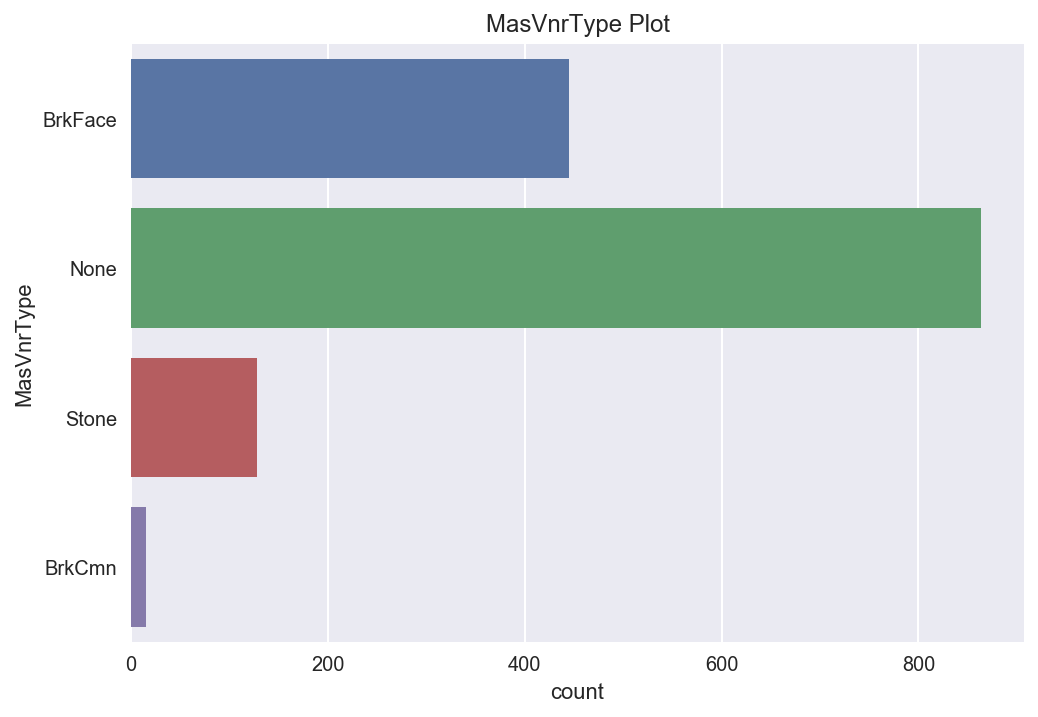

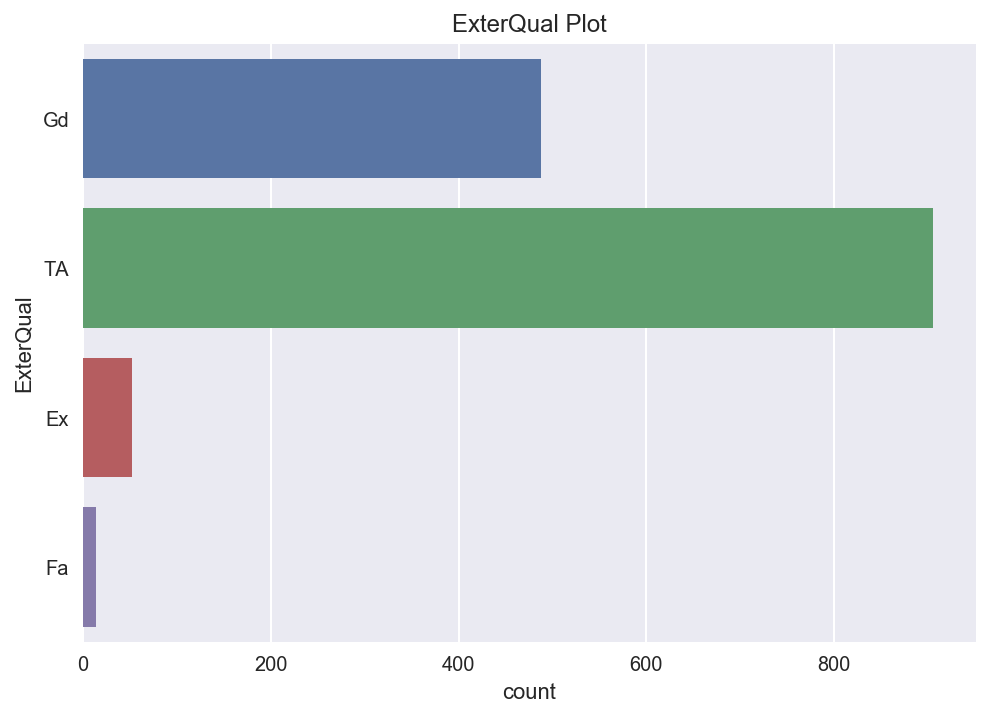

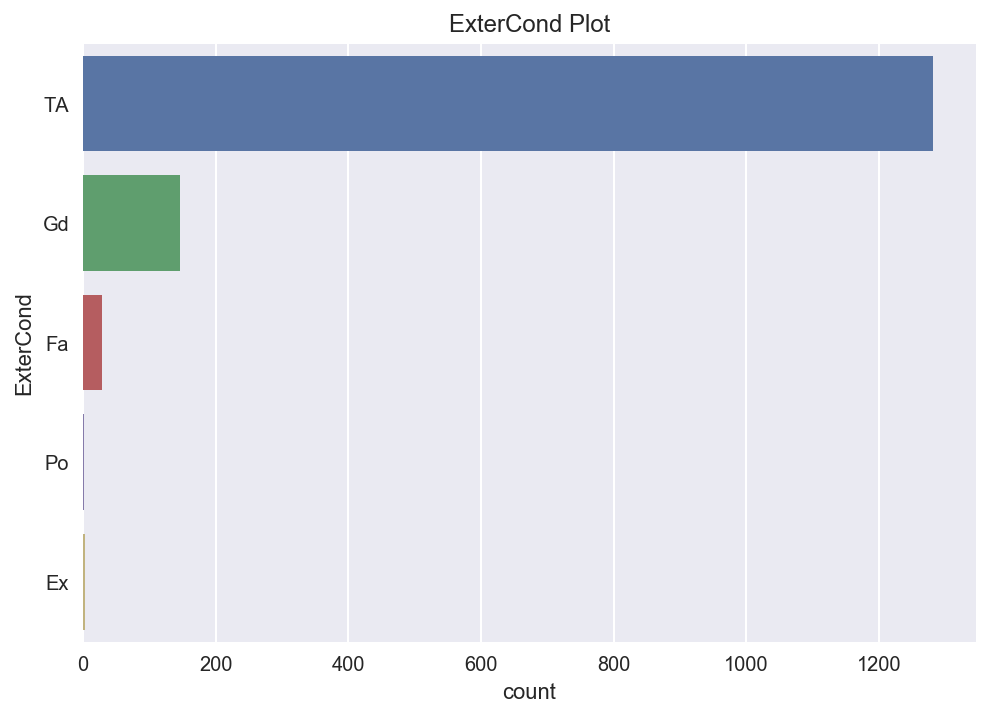

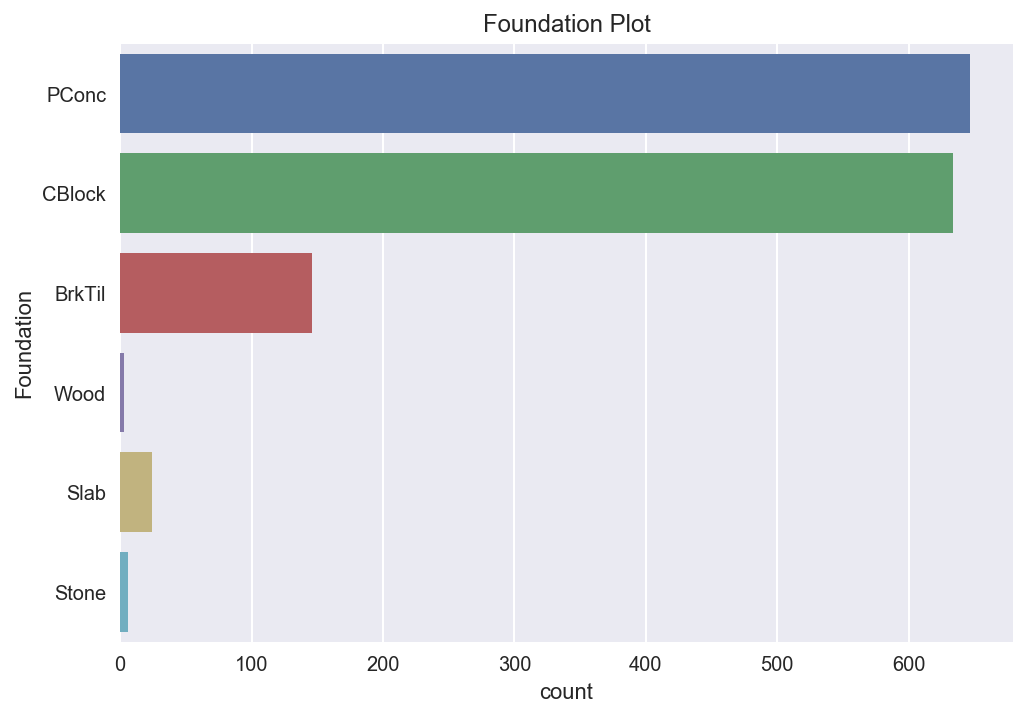

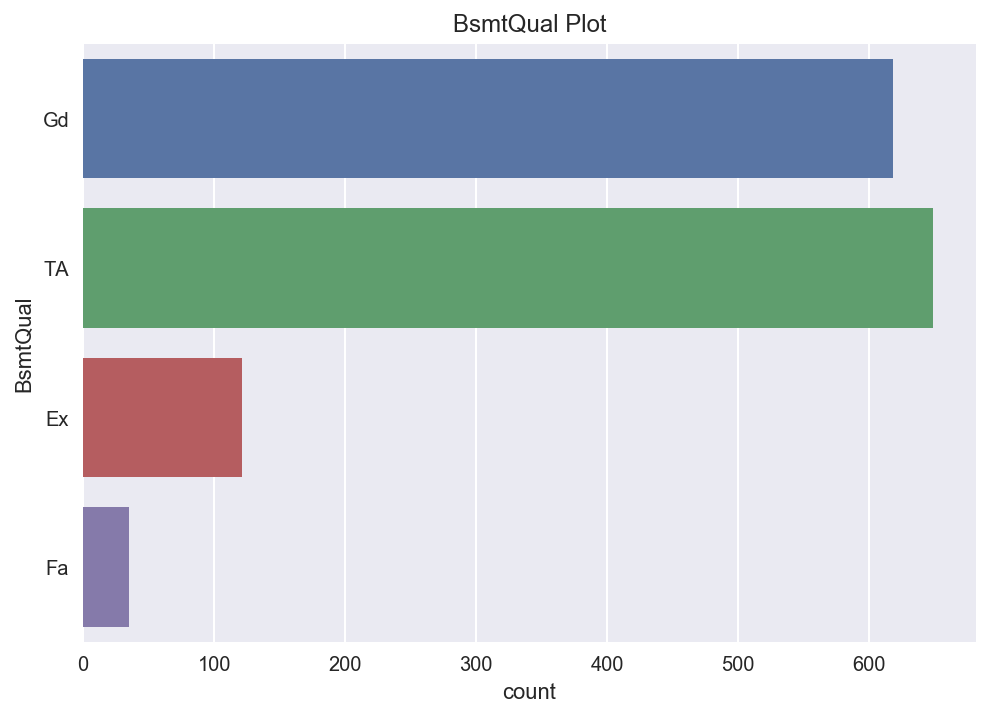

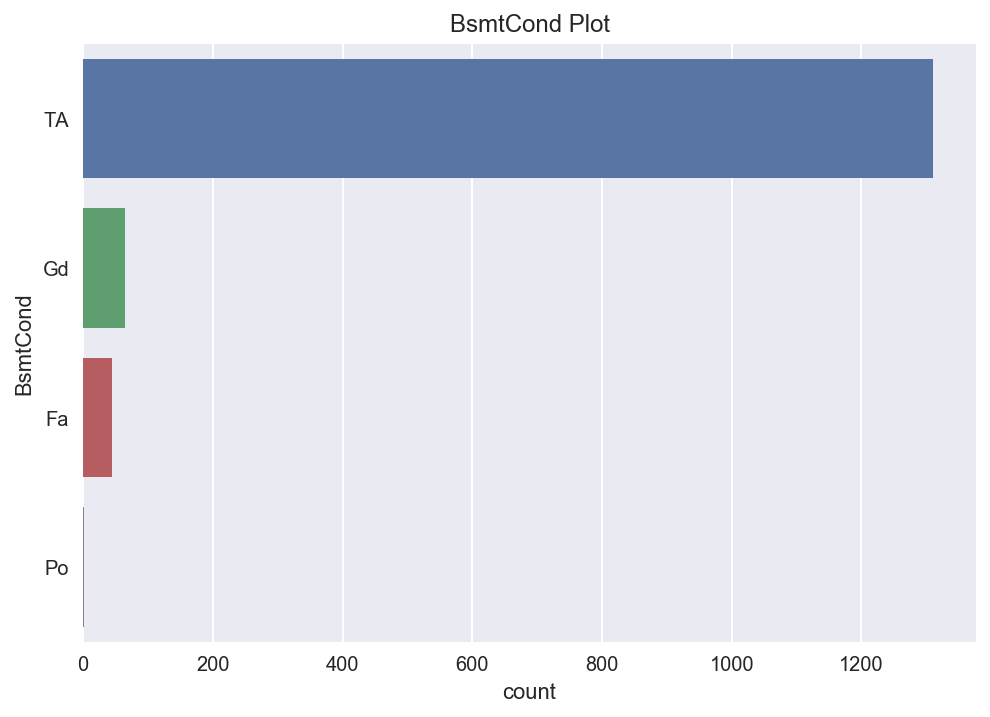

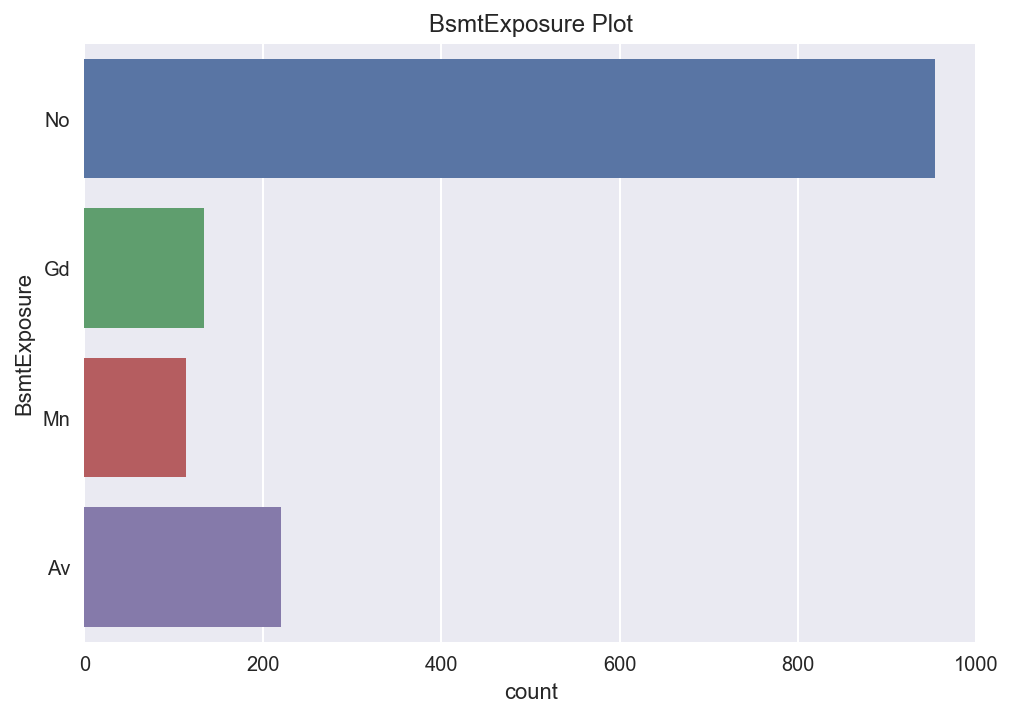

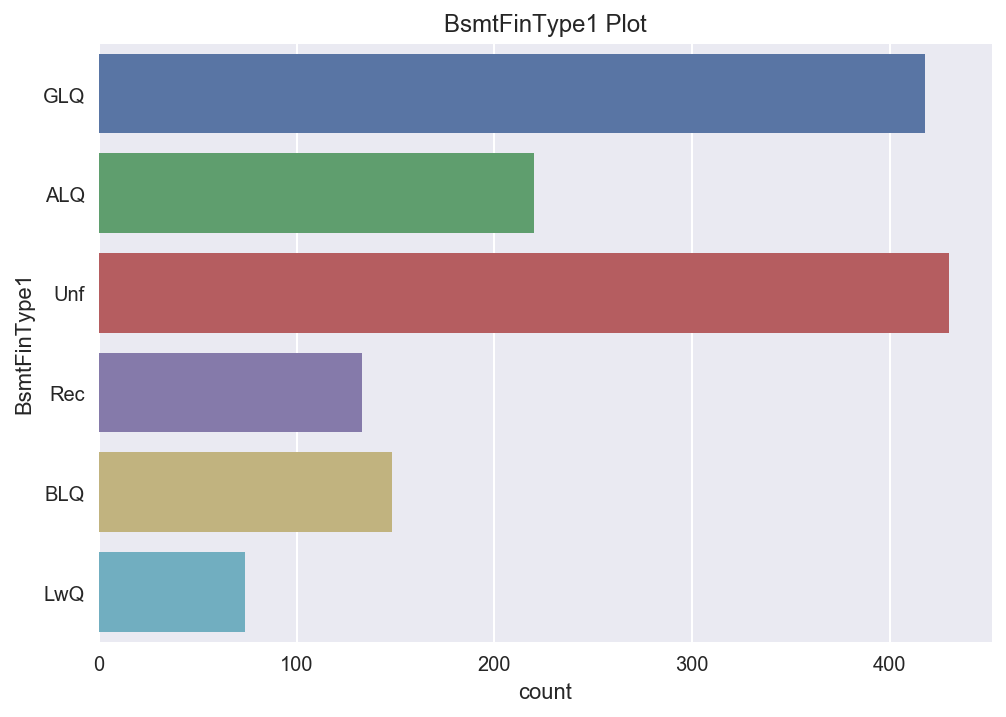

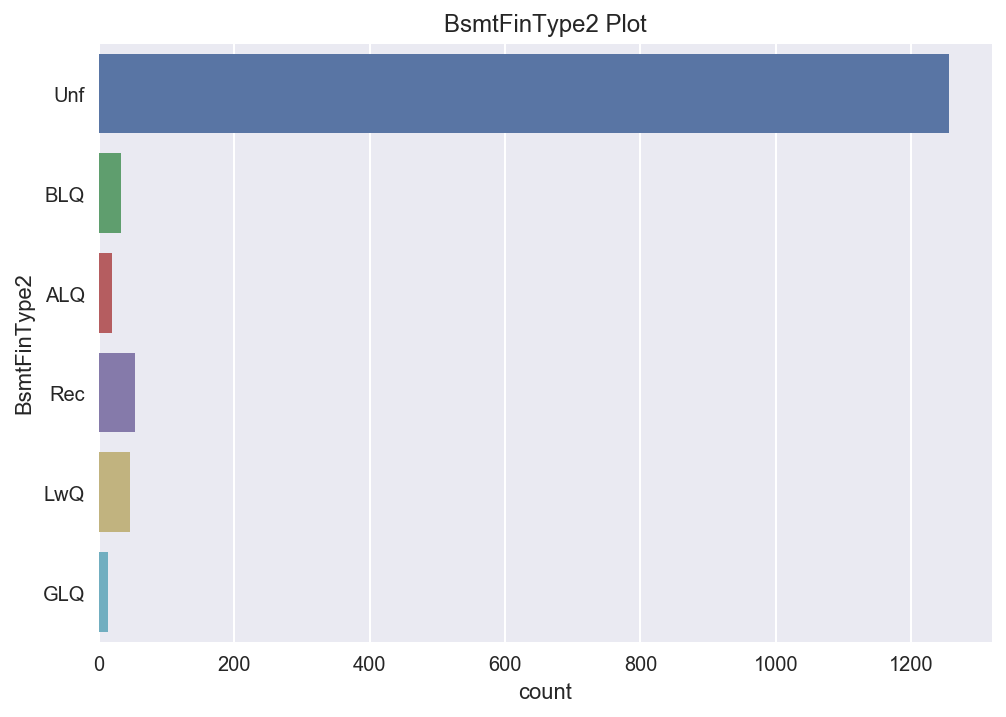

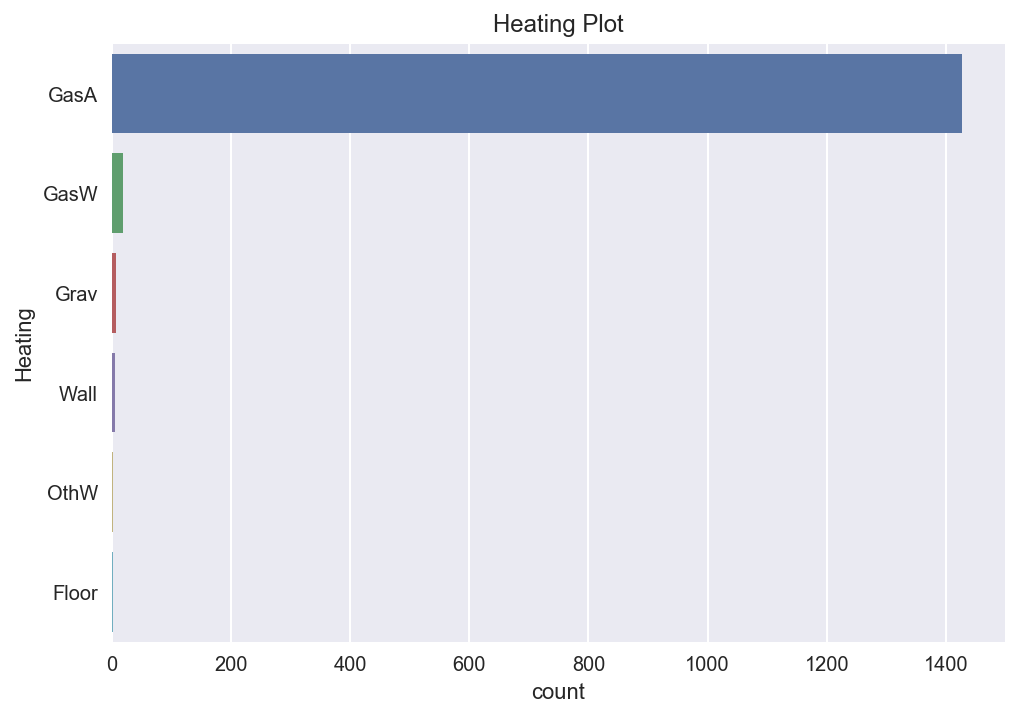

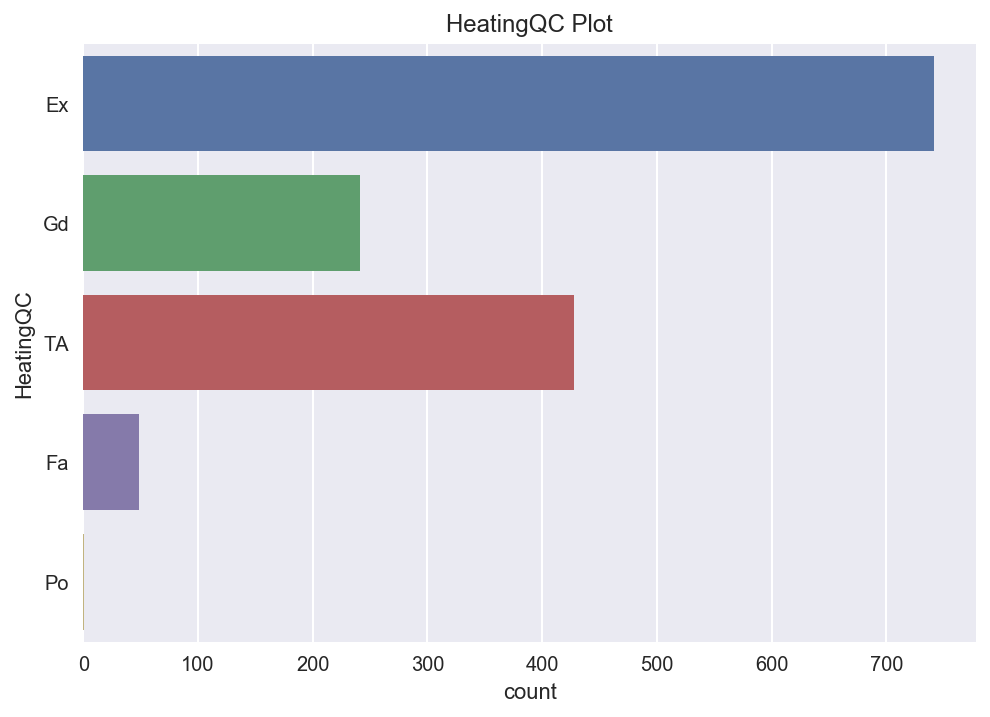

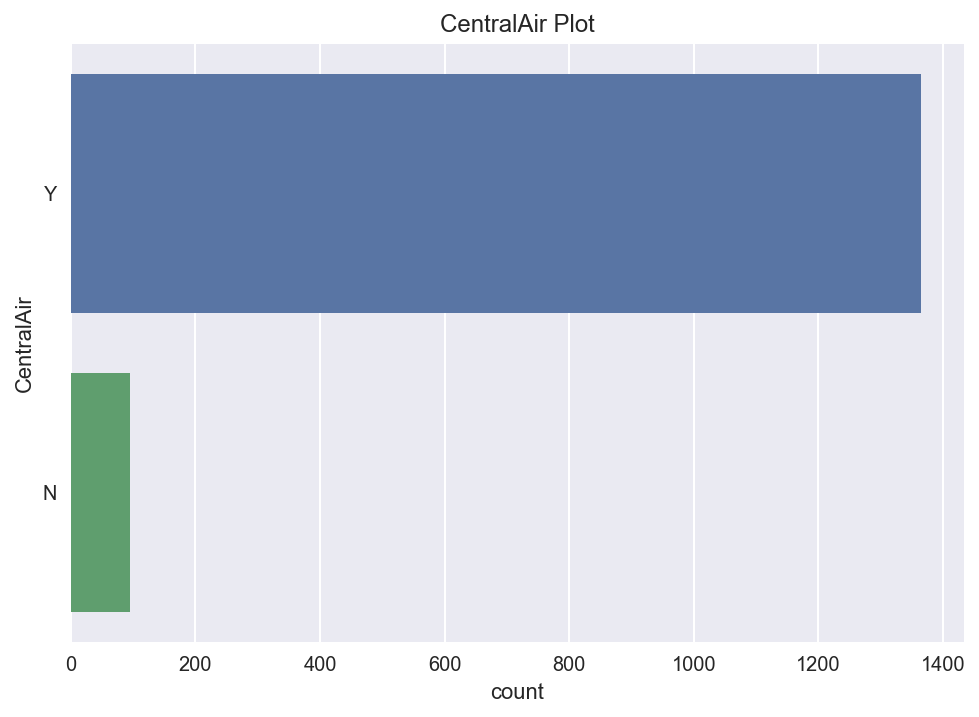

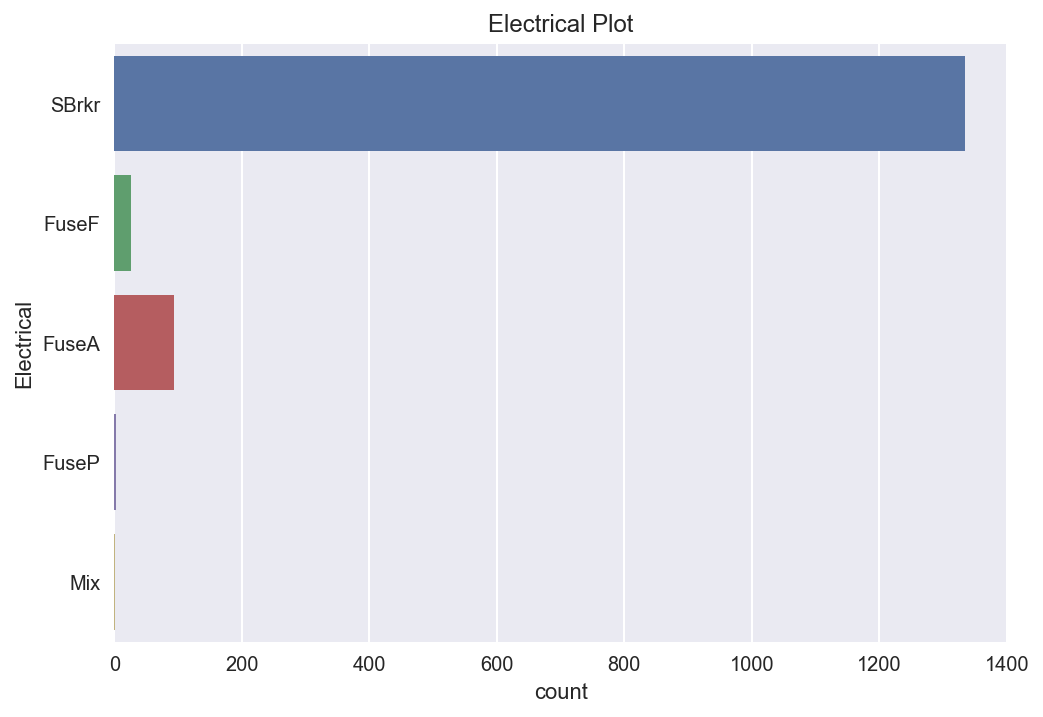

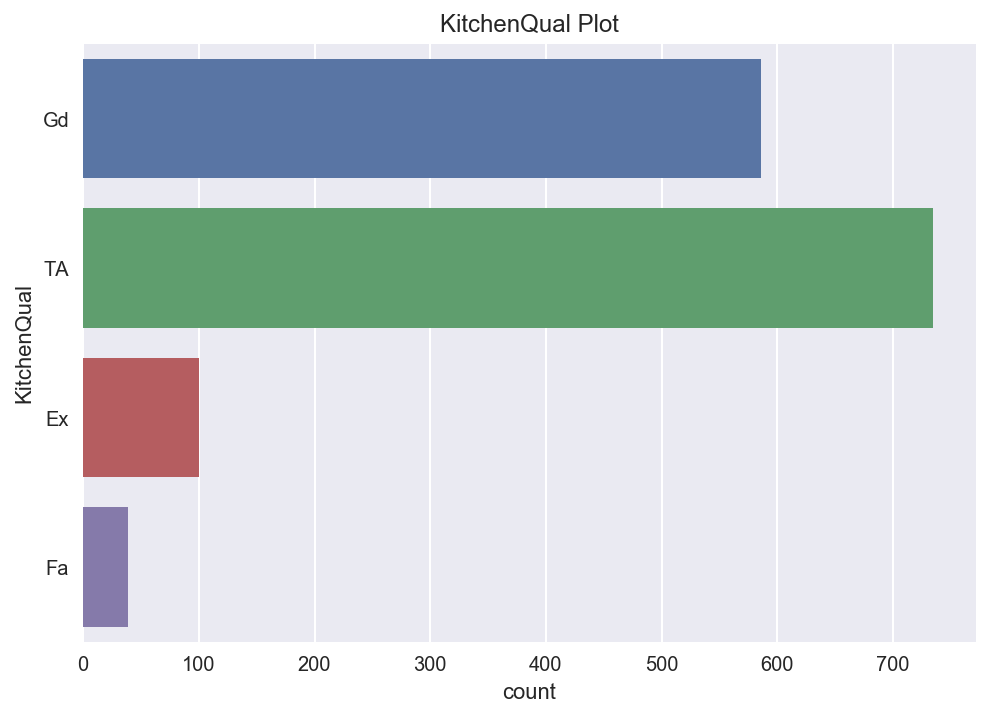

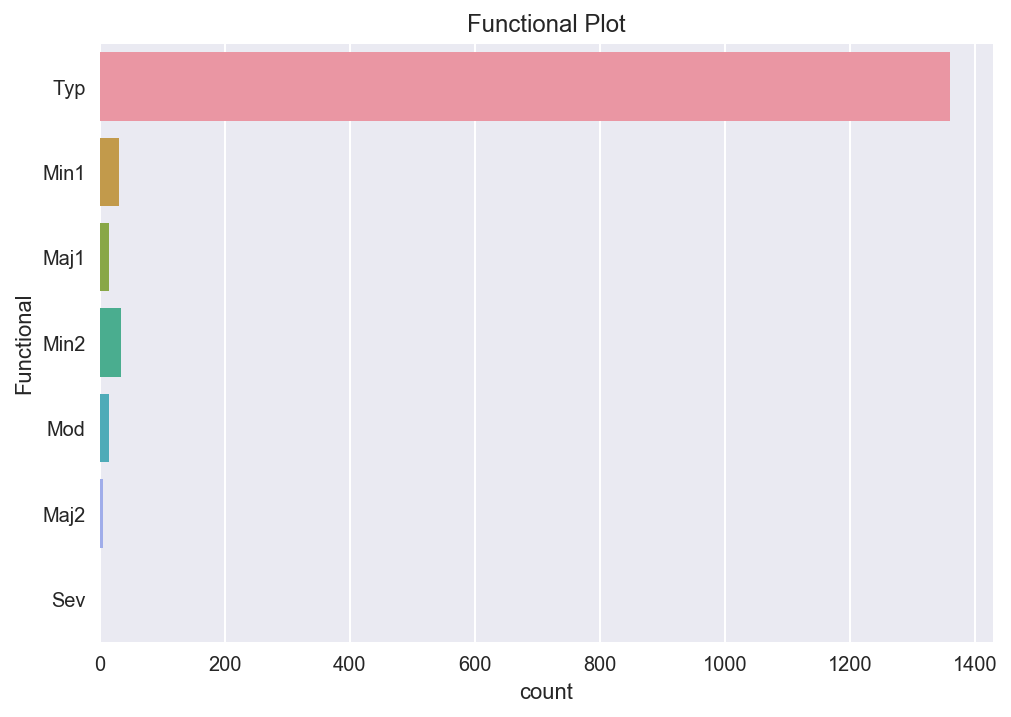

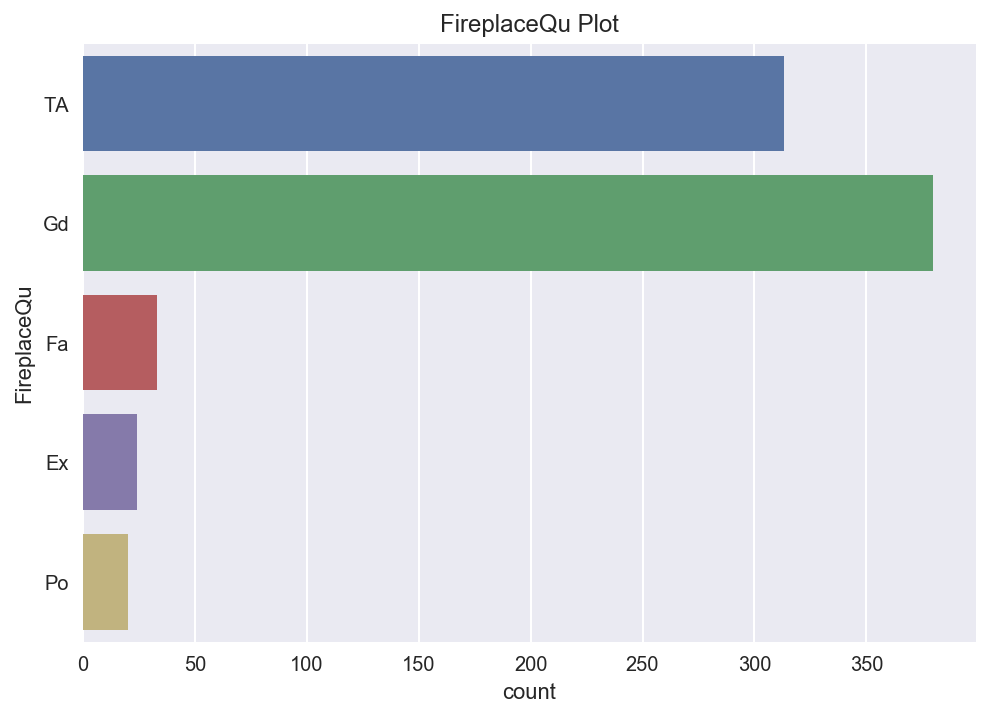

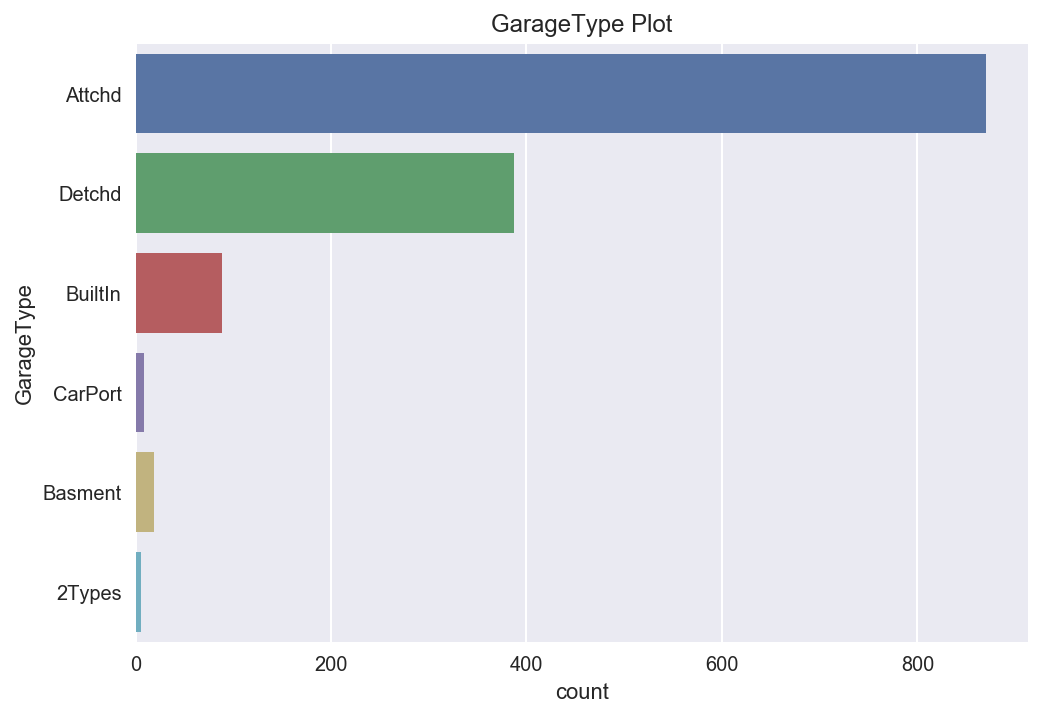

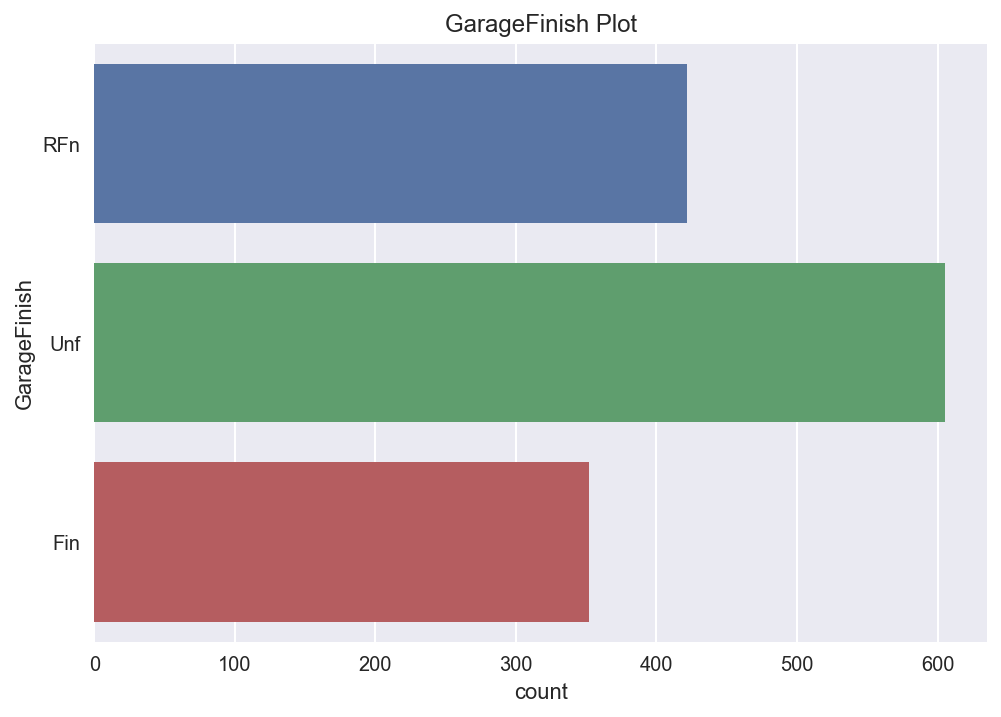

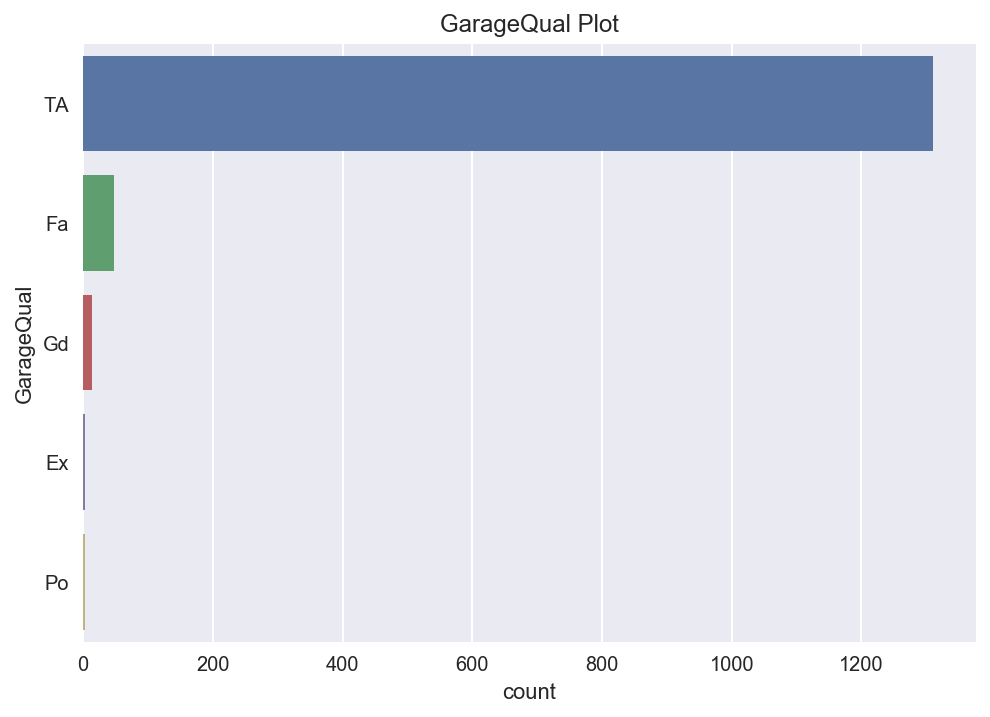

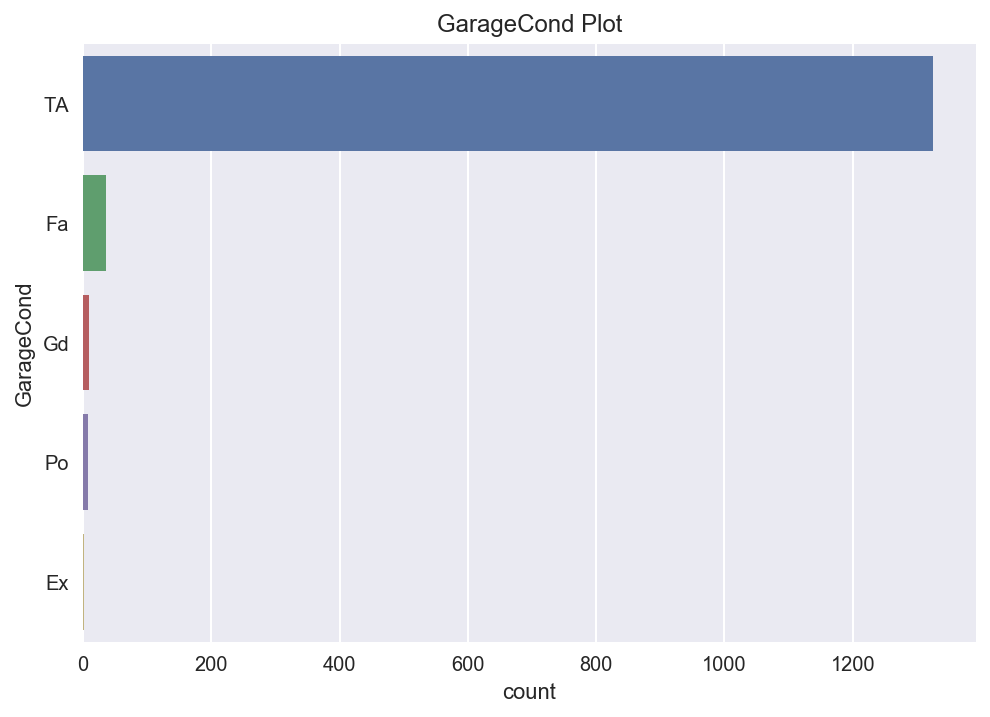

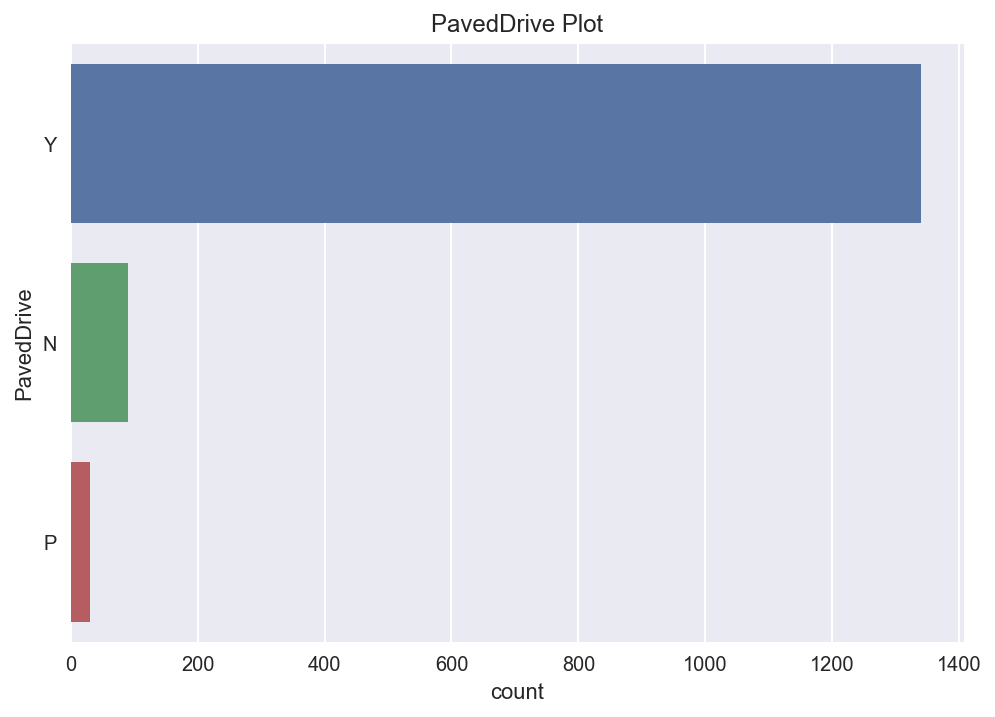

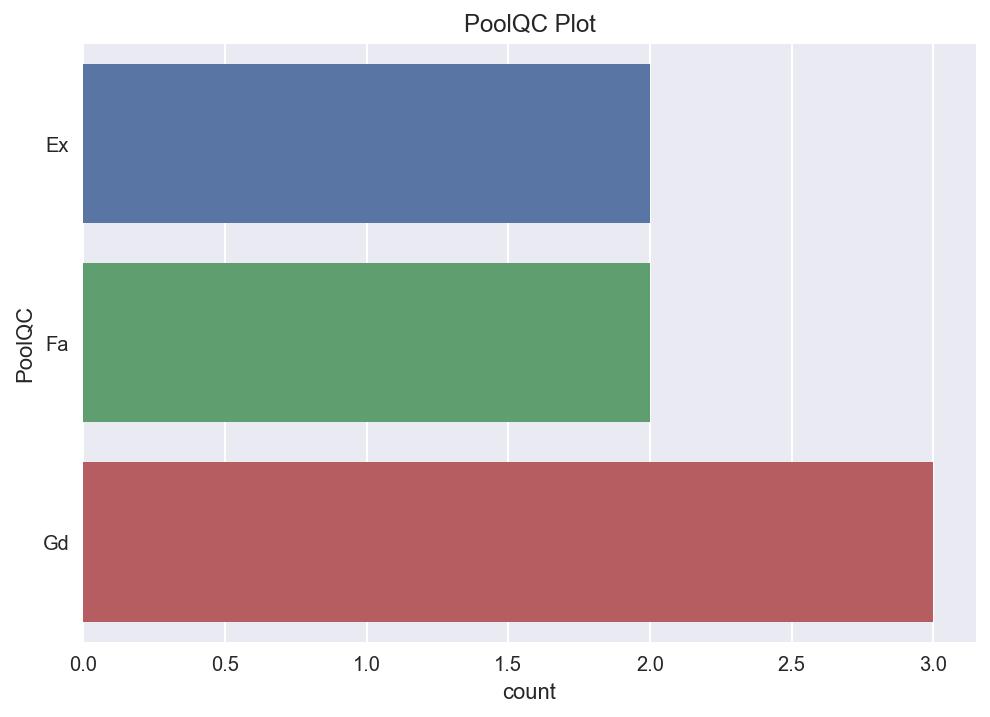

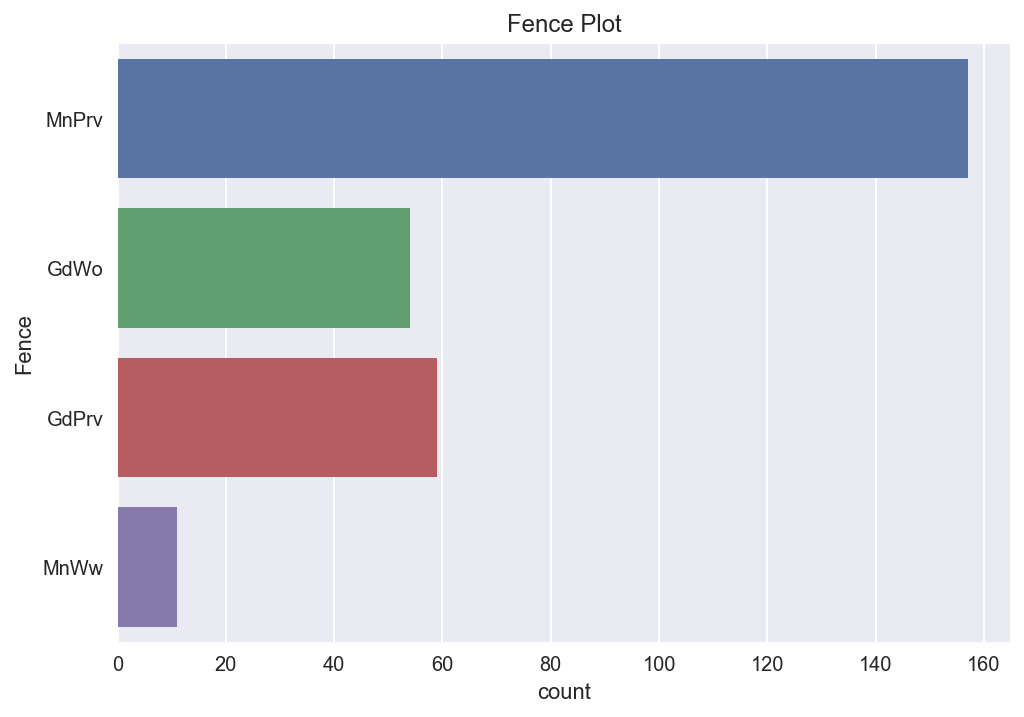

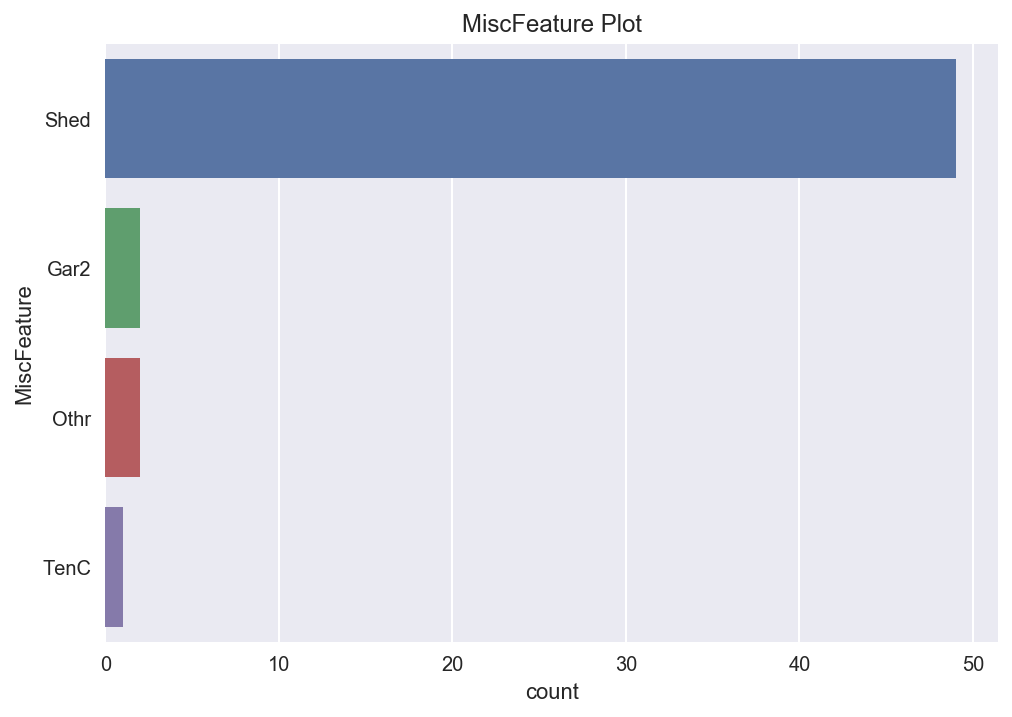

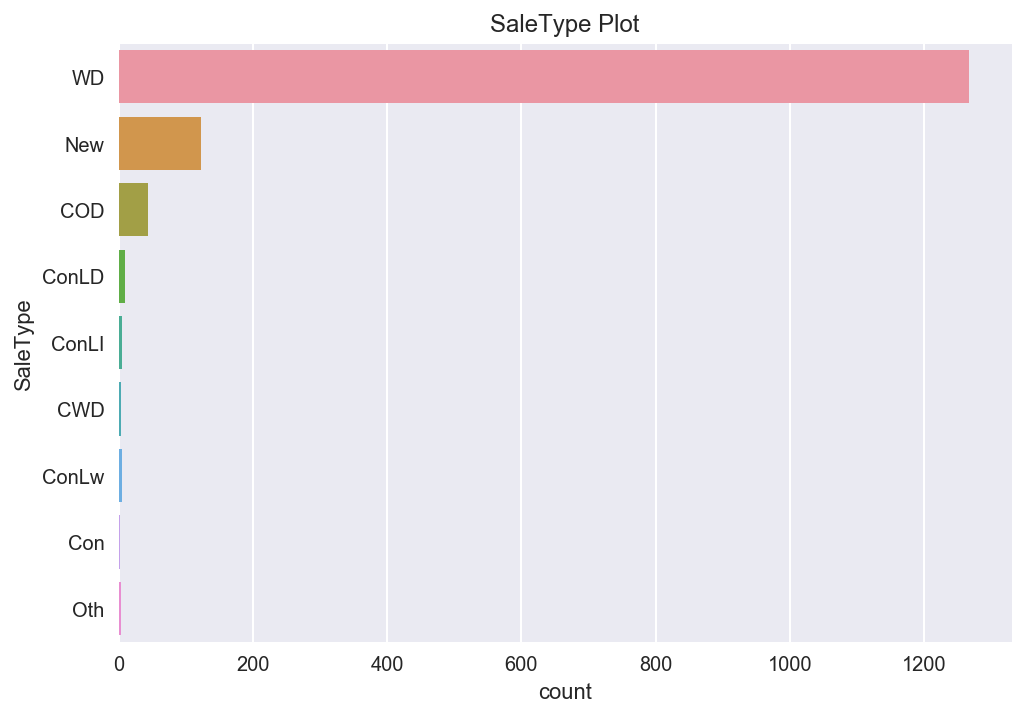

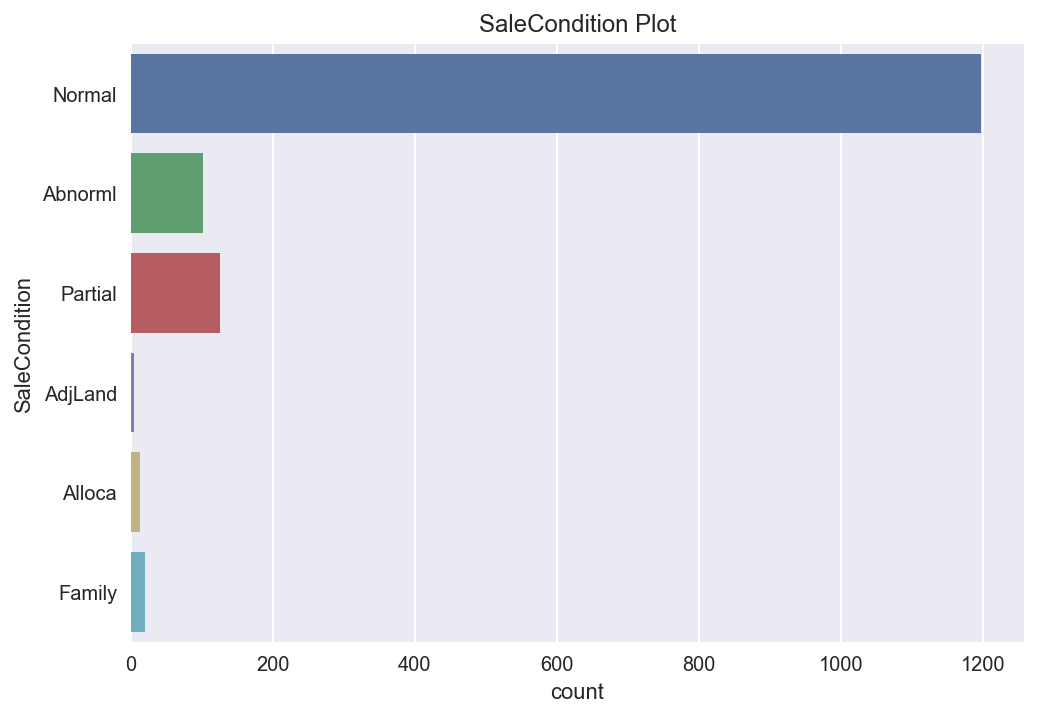

In [11]:
for c in tqdm(cat_features):
    plt.figure()
    plt.title(str(c) + ' Plot')
    sns.countplot(y=train_data[c])

100%|██████████| 36/36 [00:21<00:00,  3.88it/s]


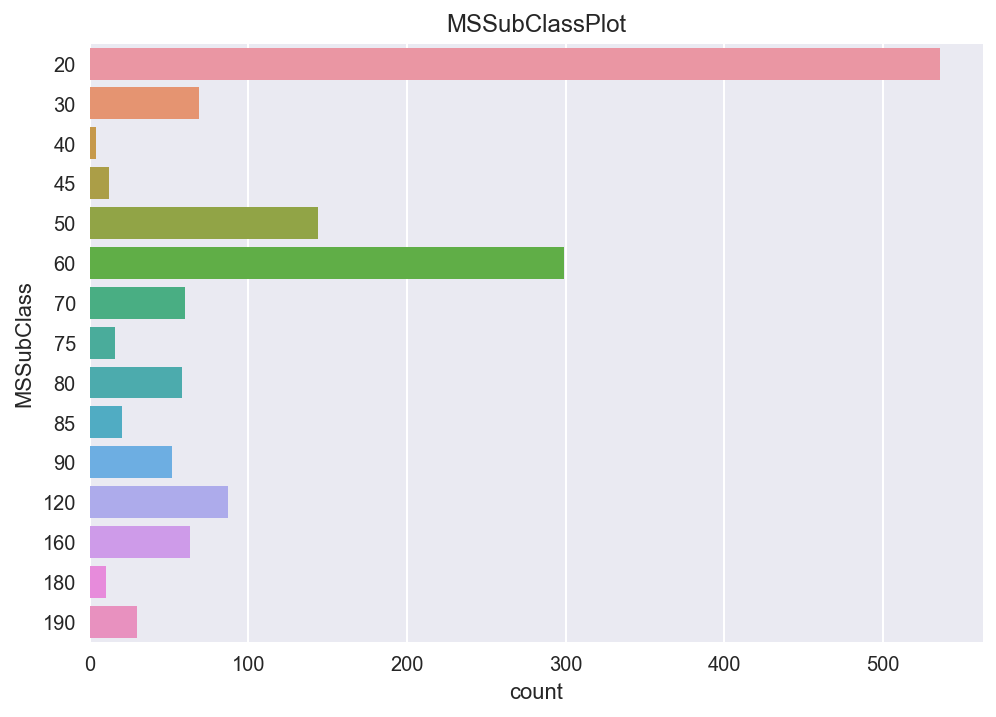

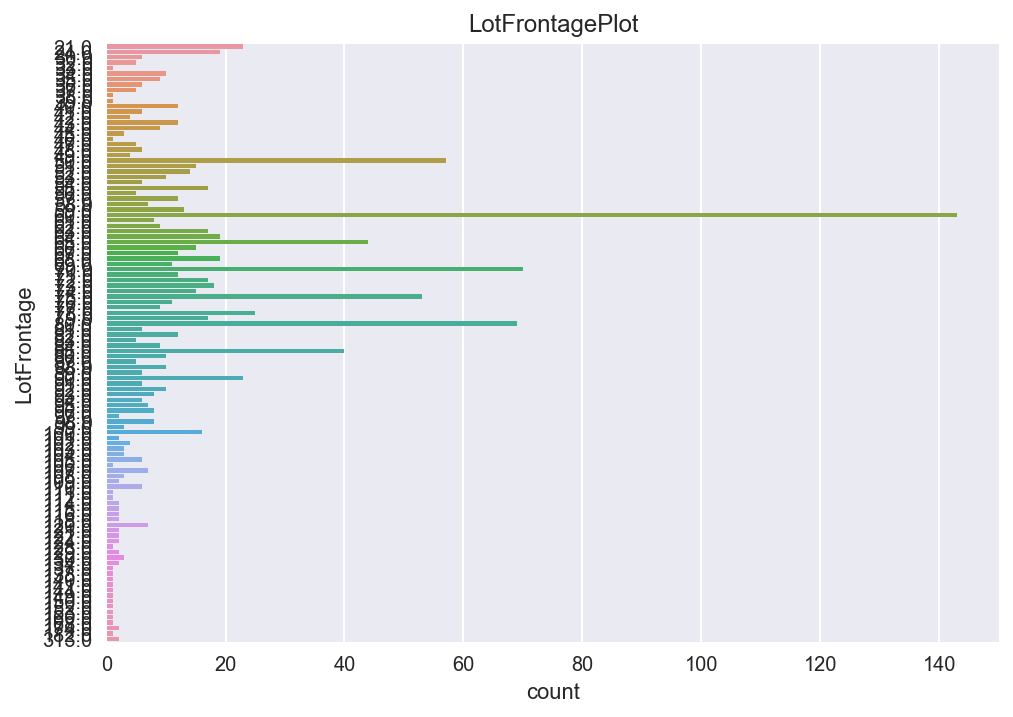

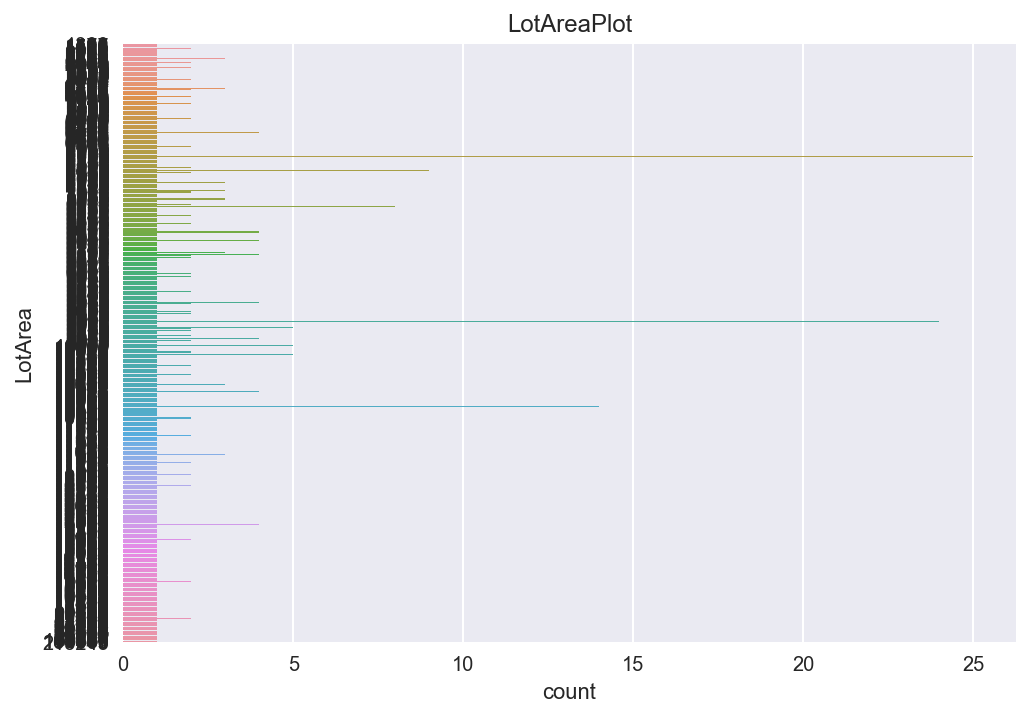

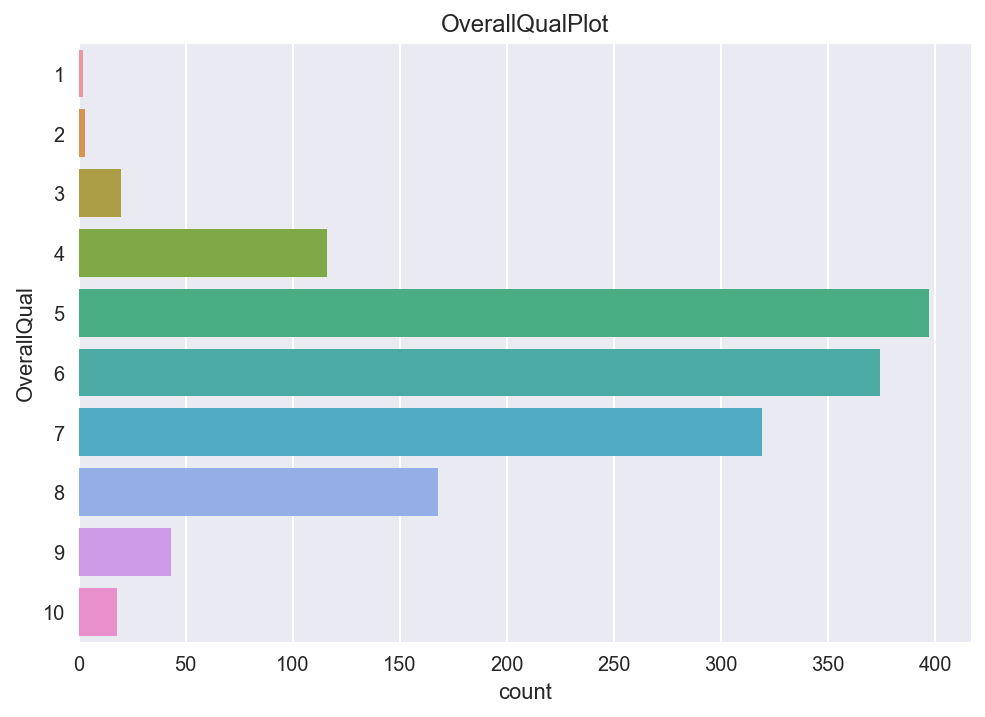

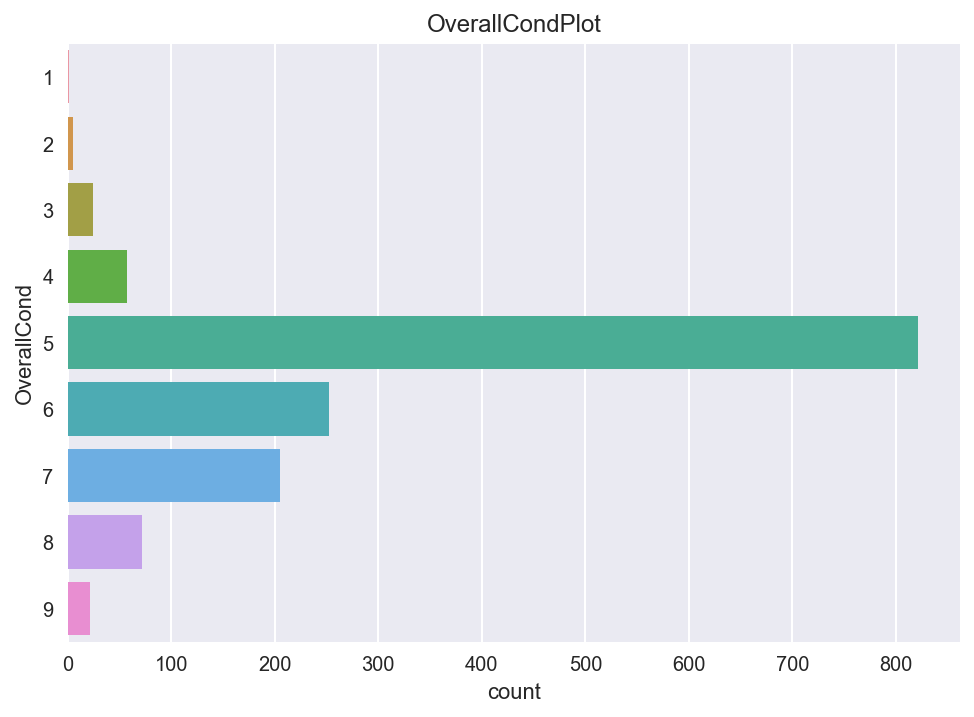

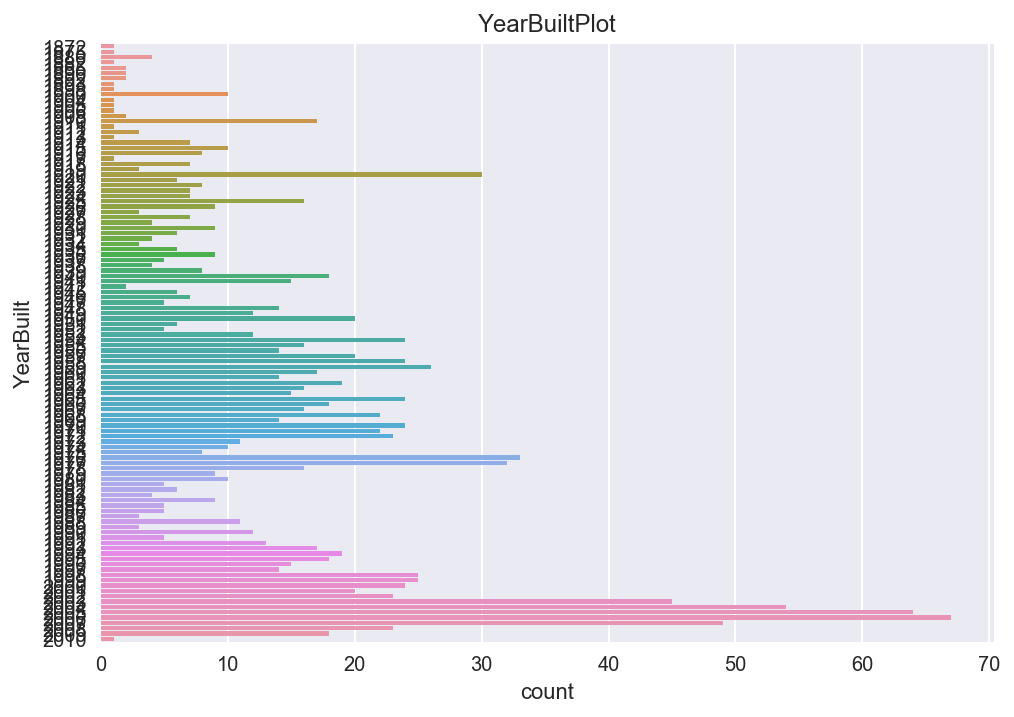

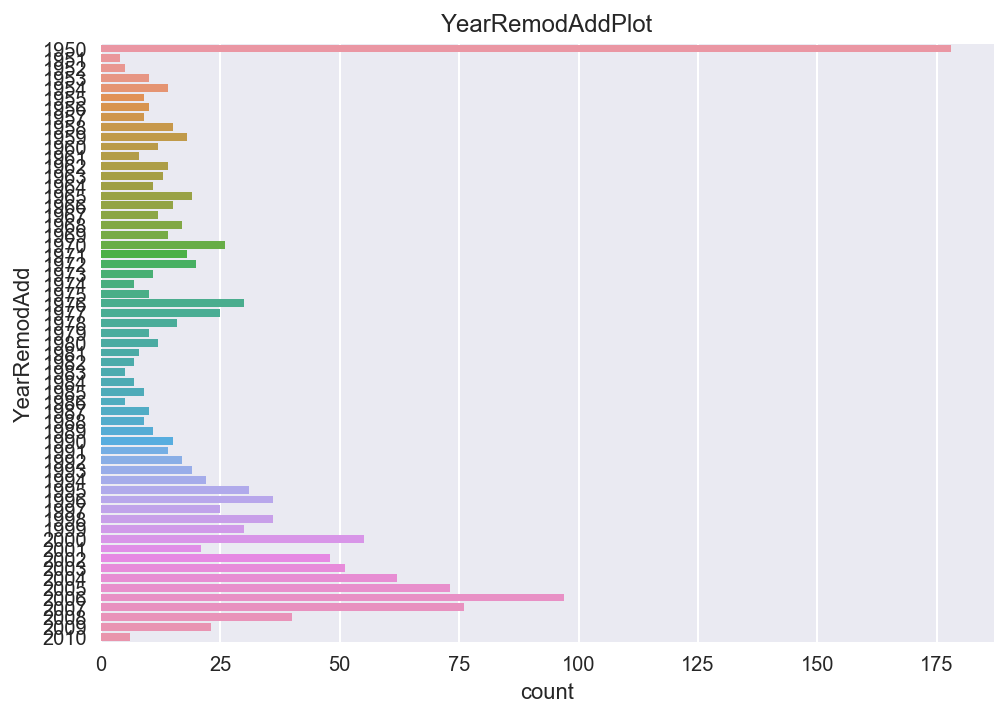

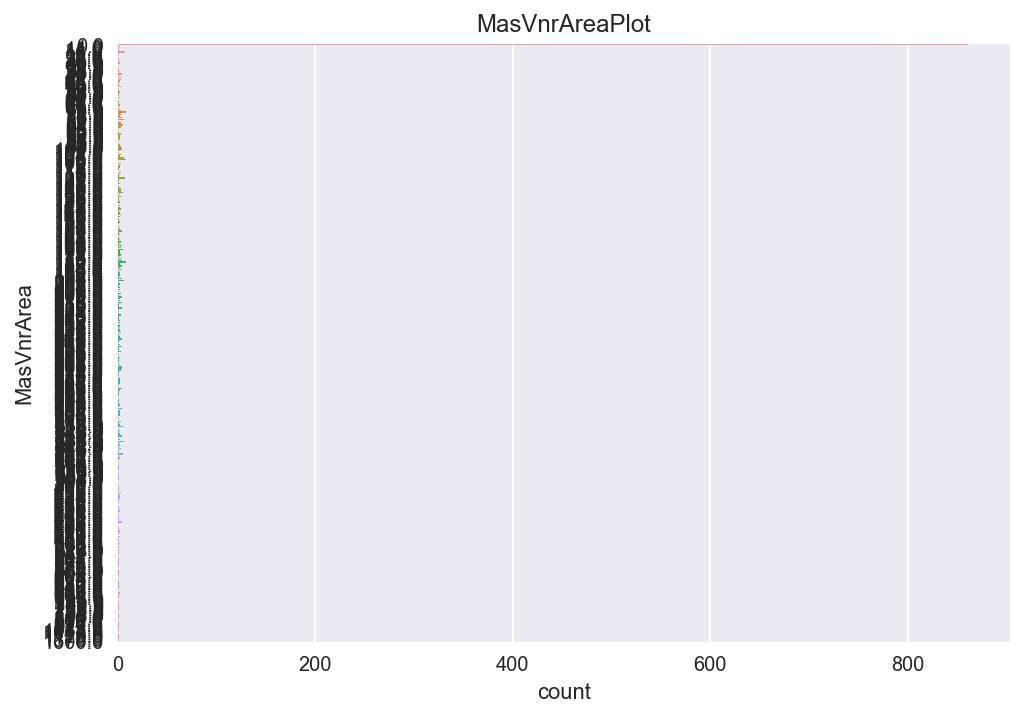

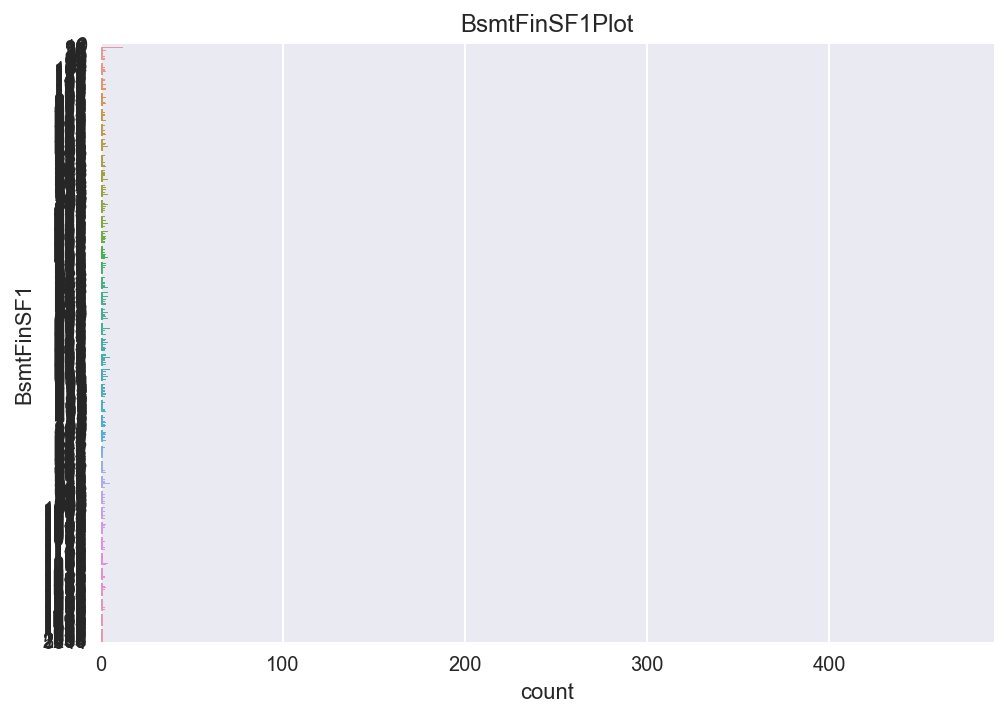

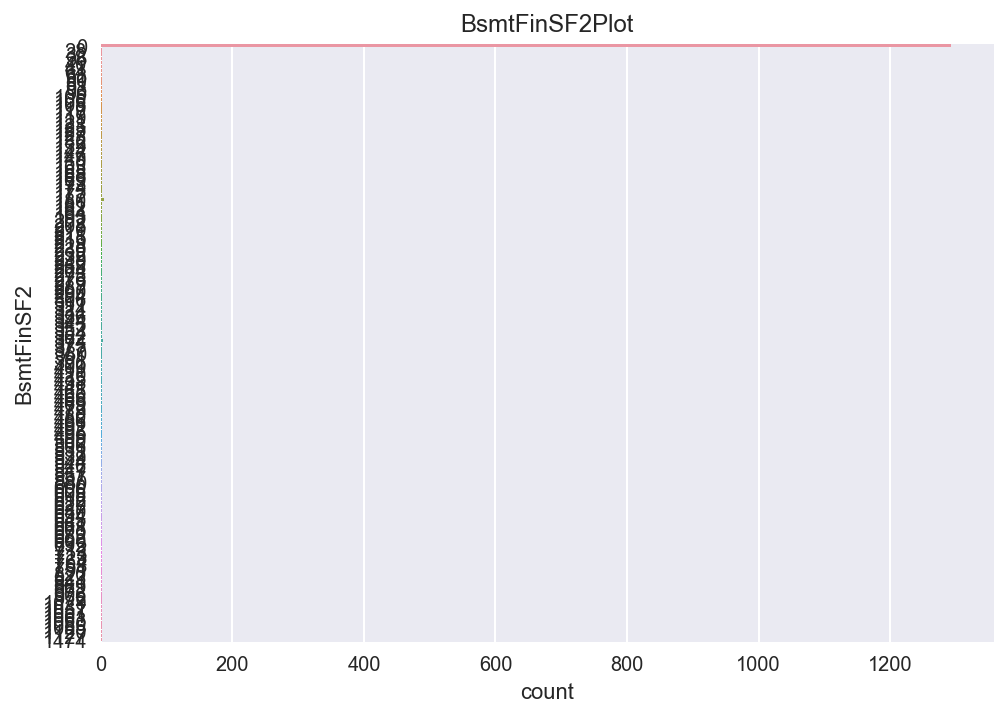

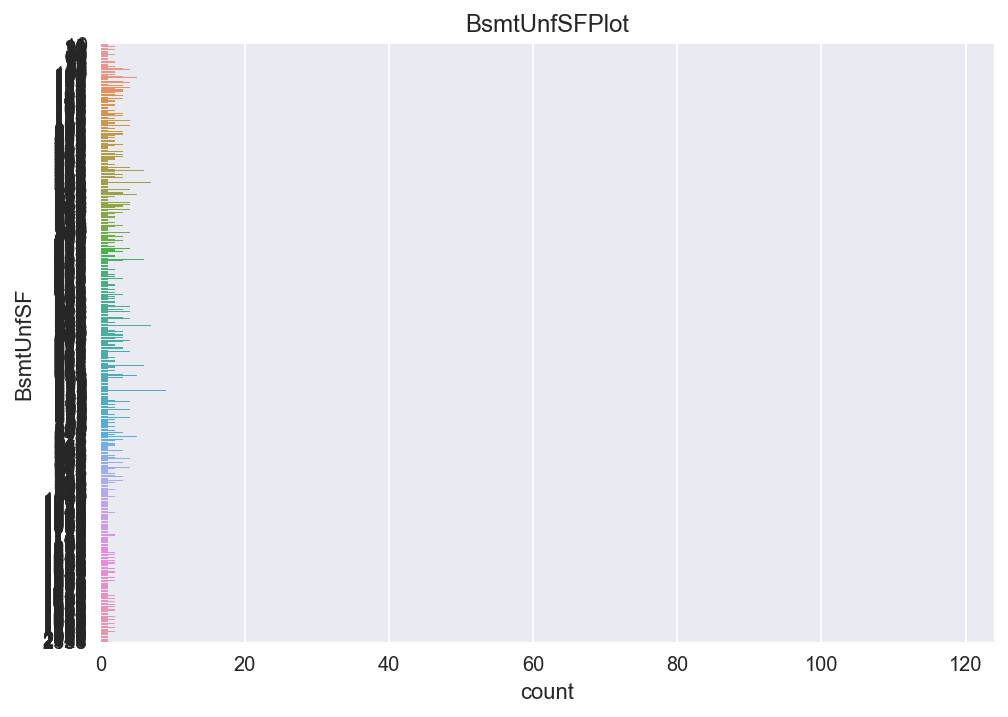

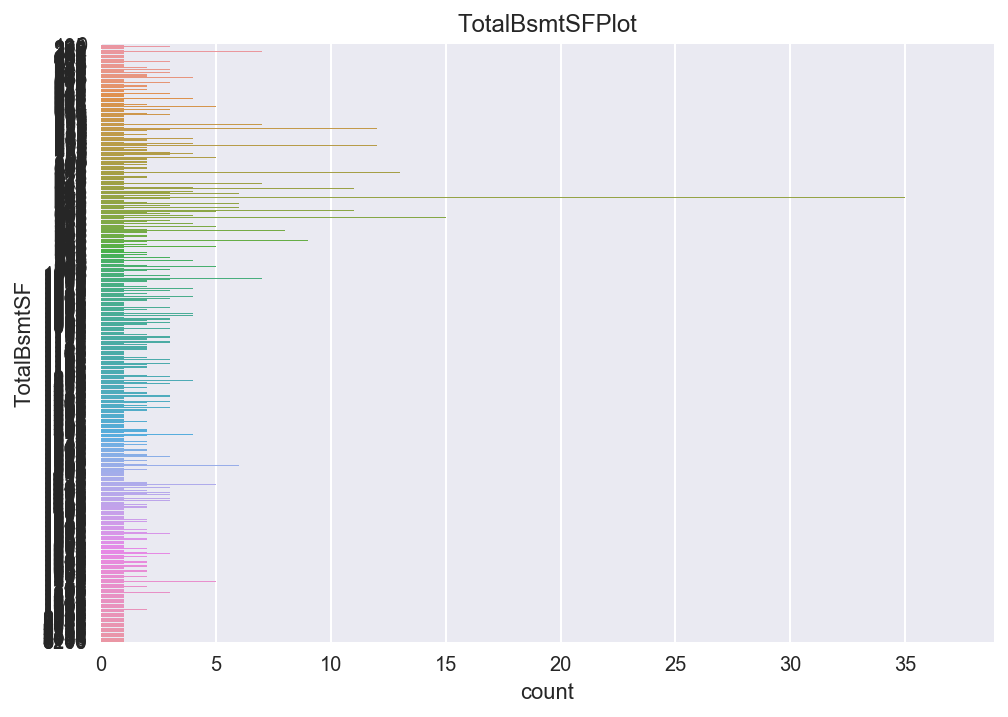

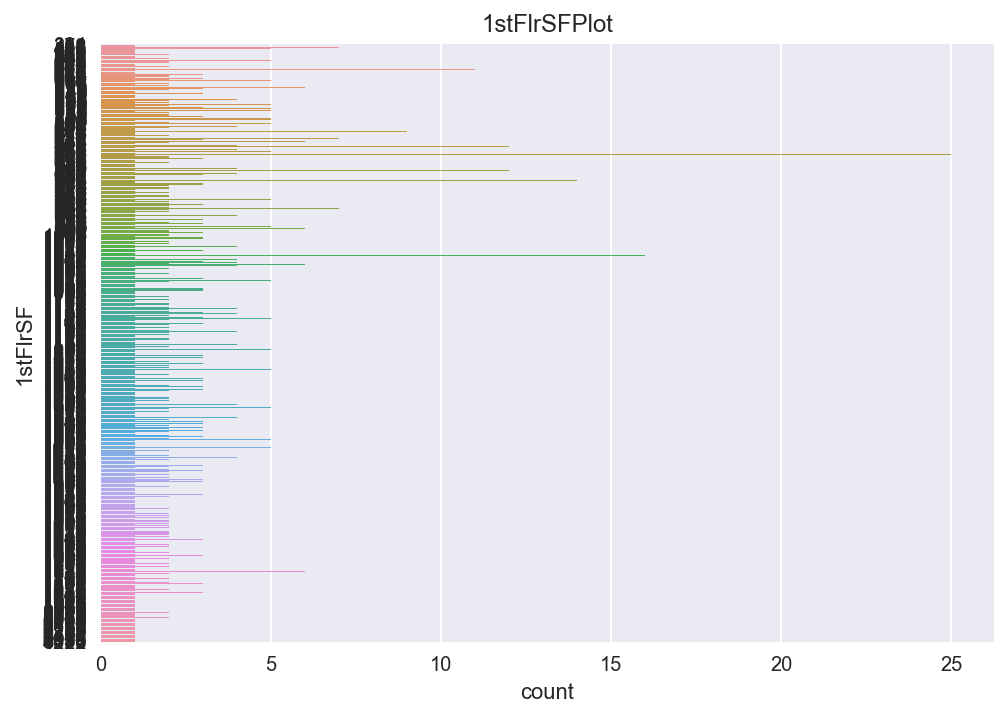

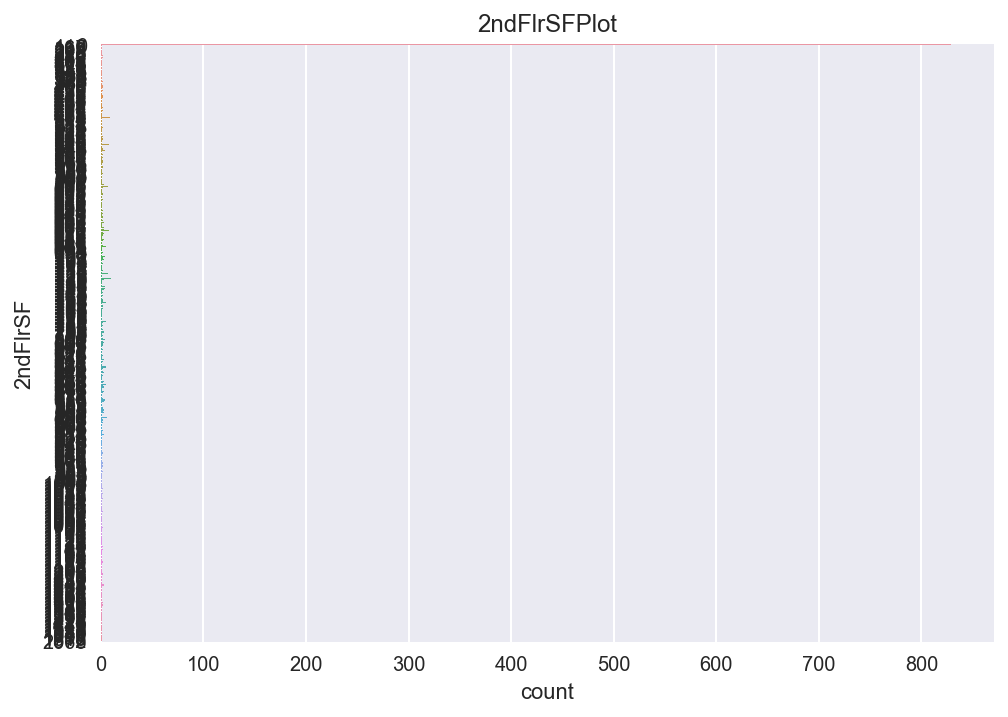

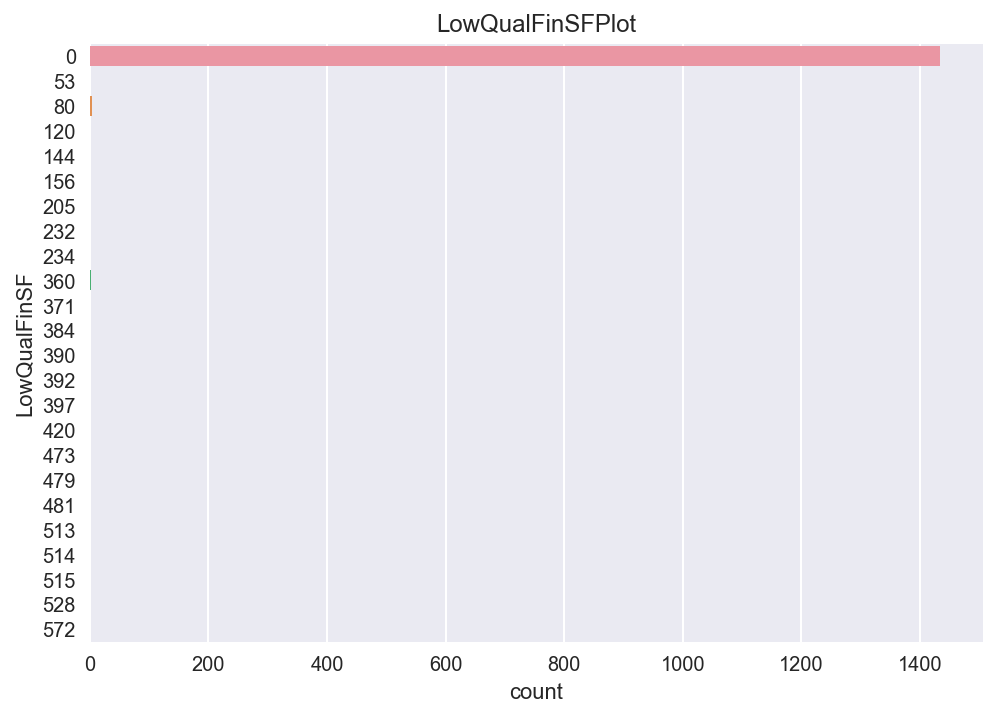

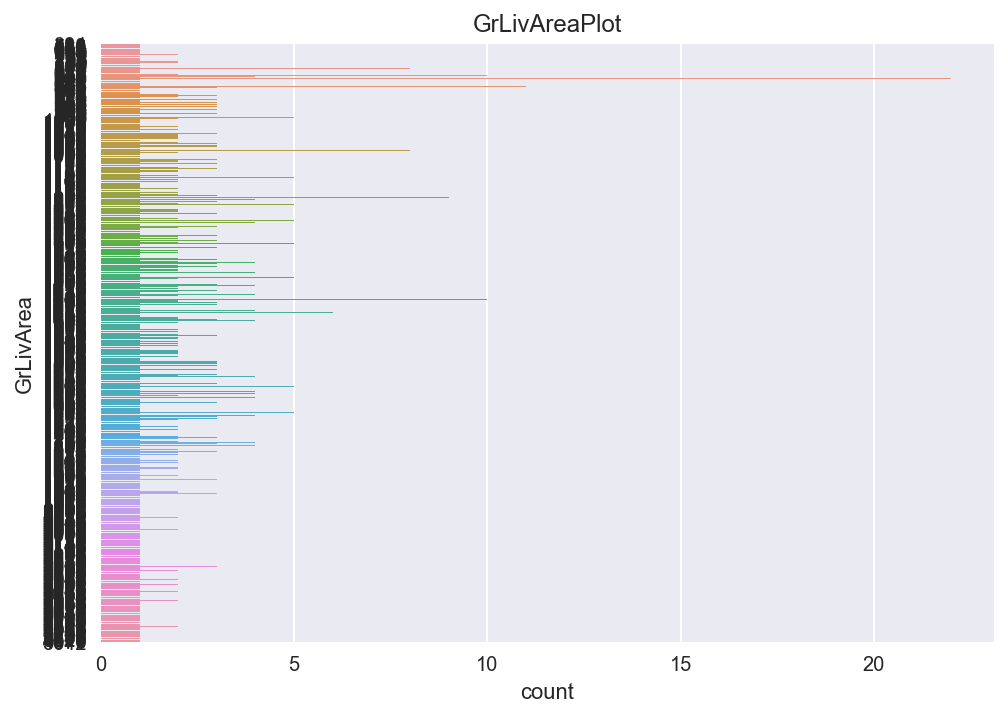

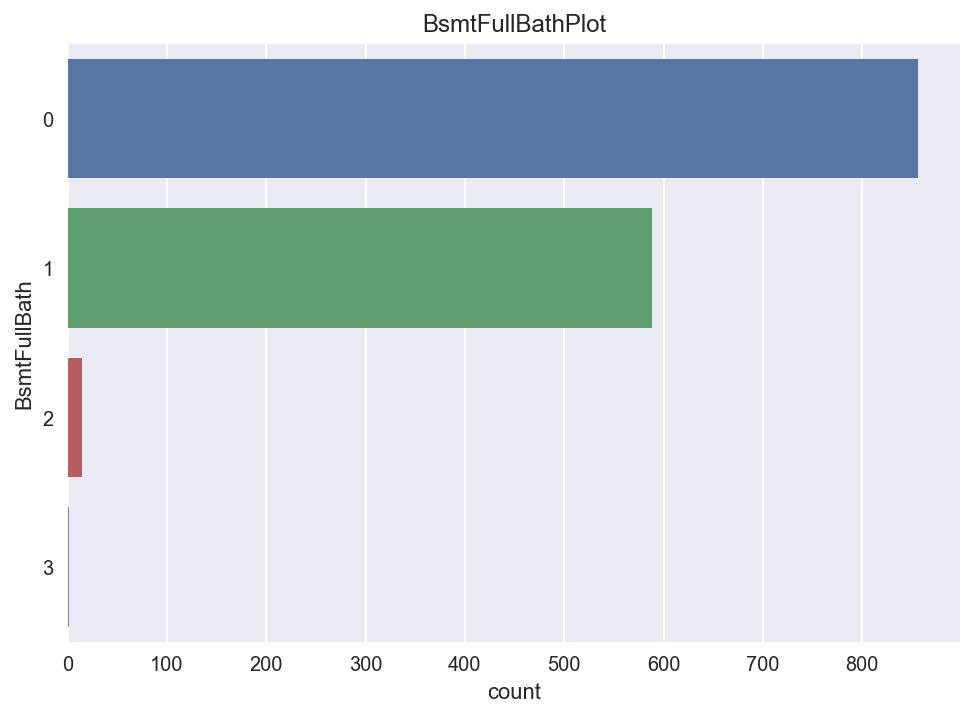

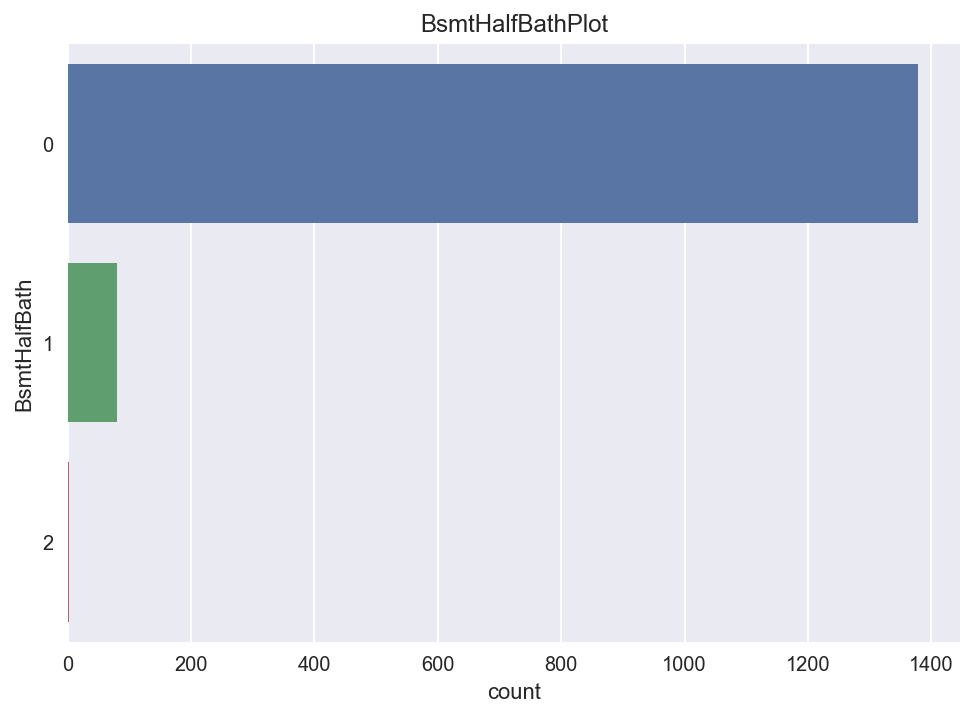

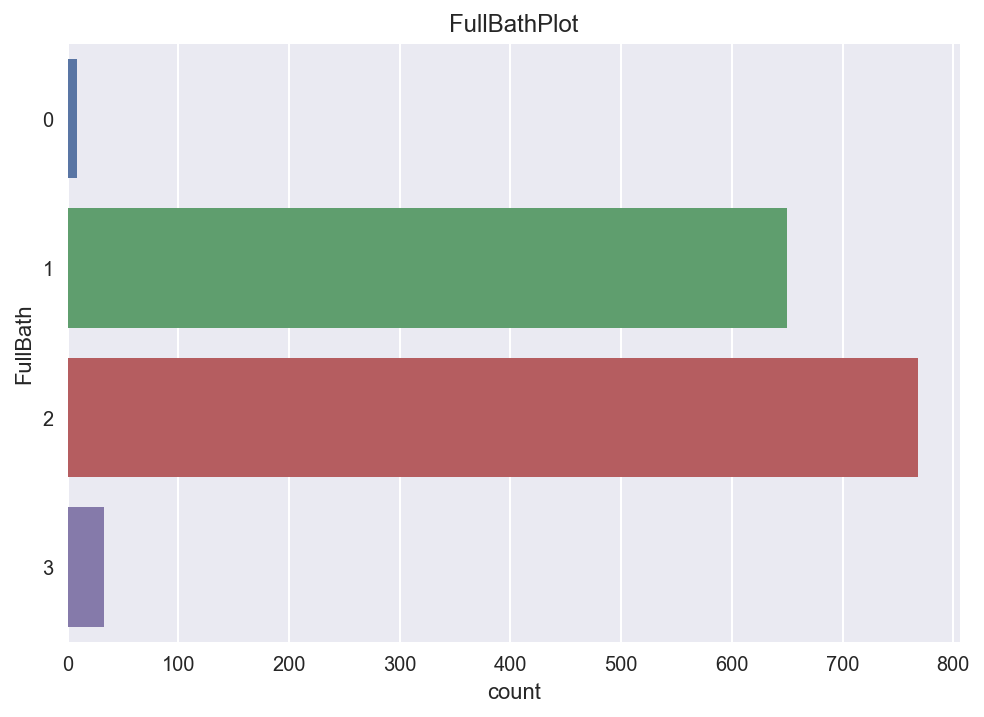

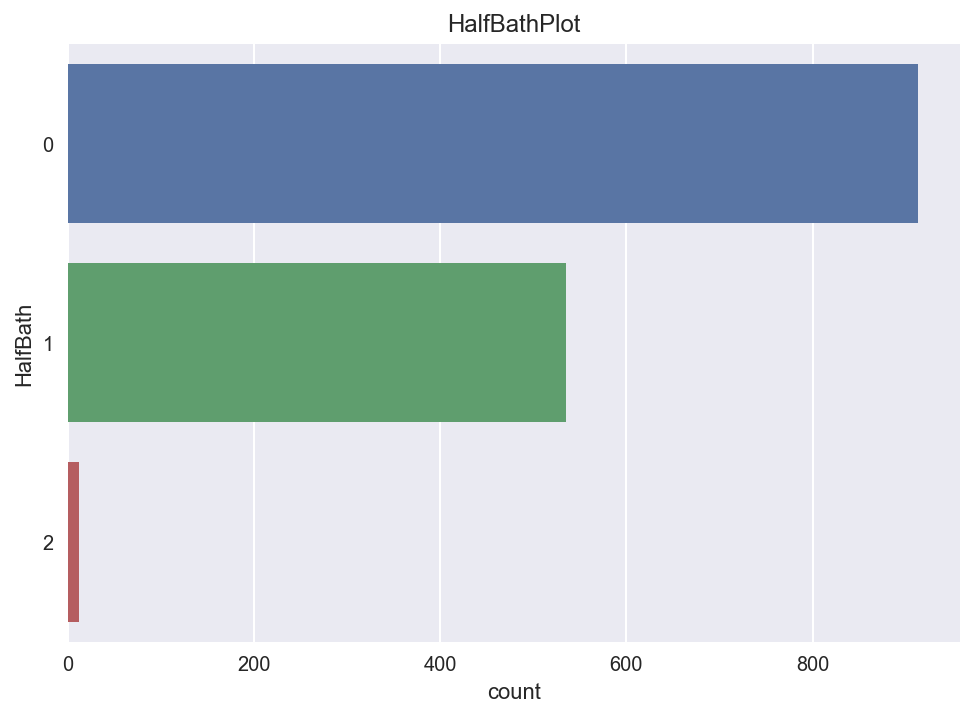

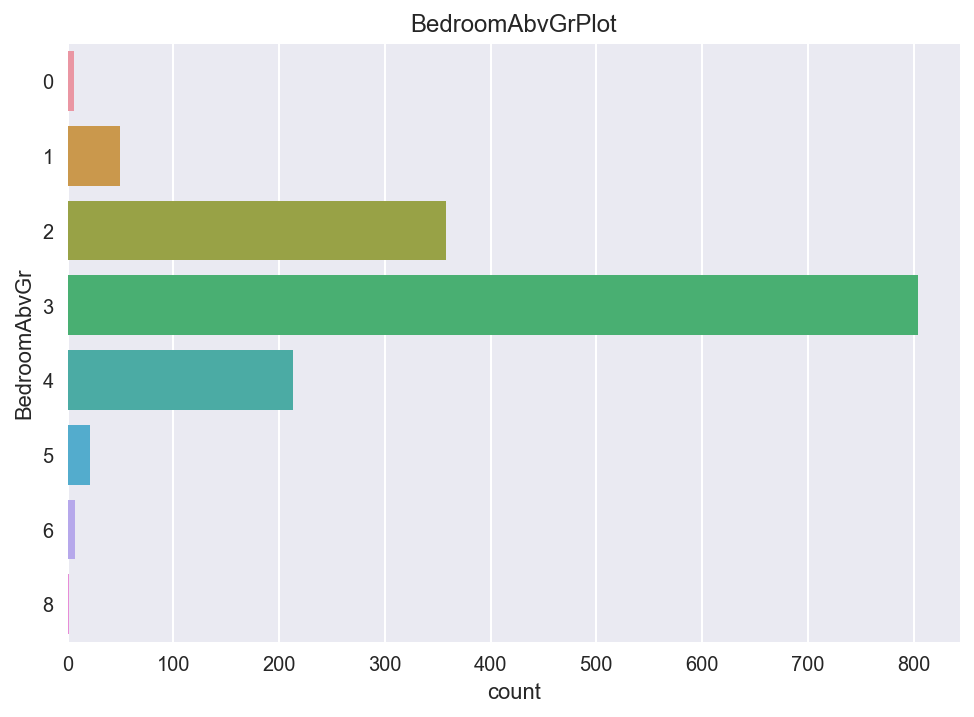

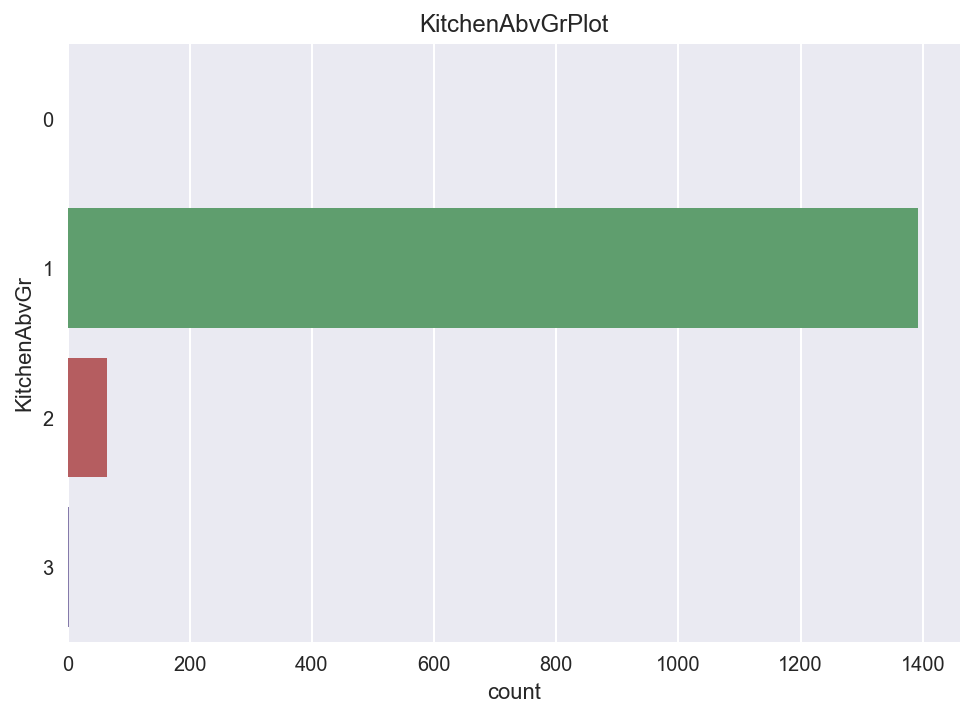

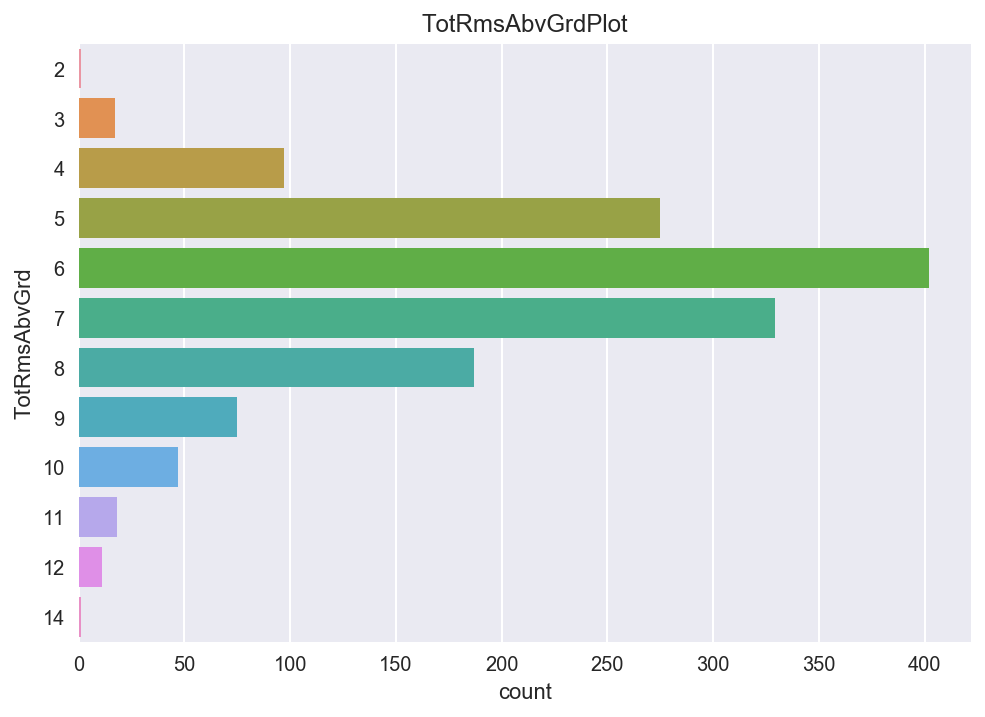

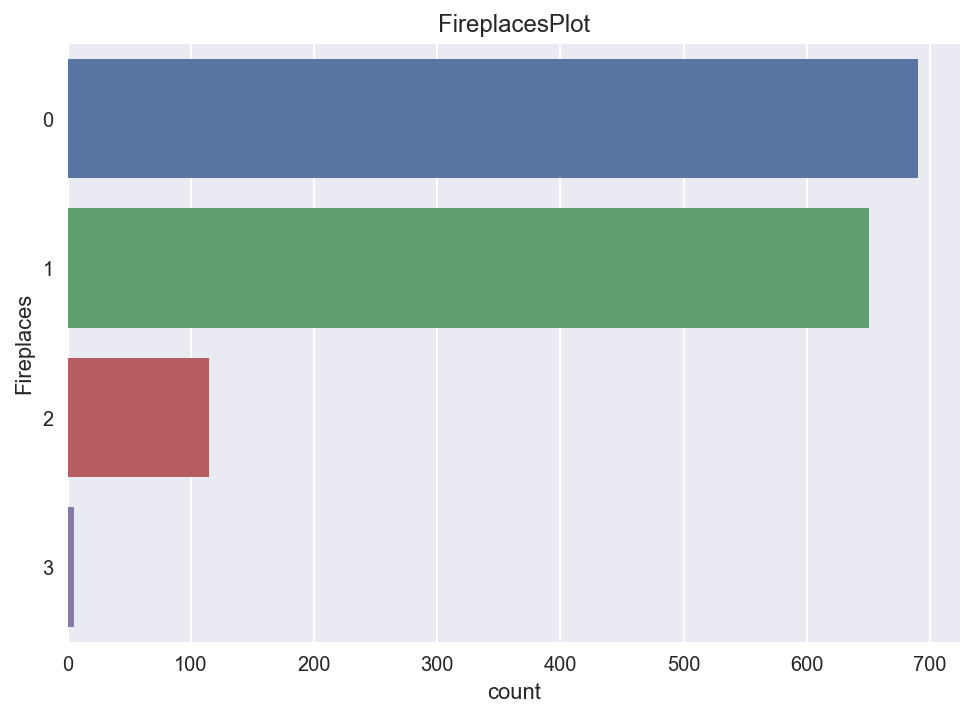

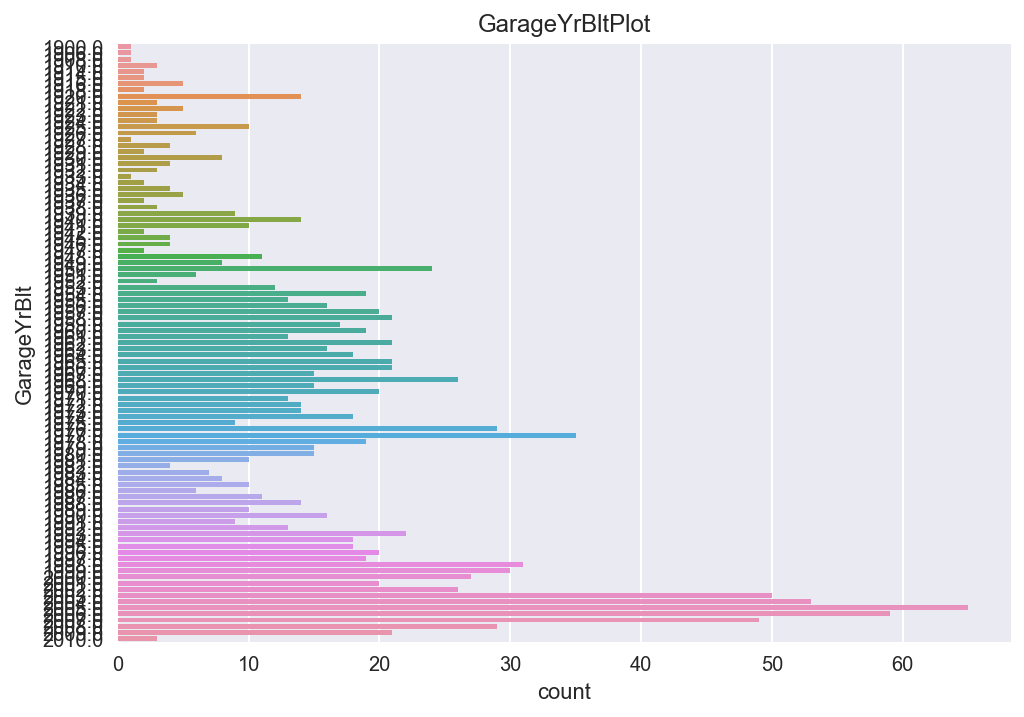

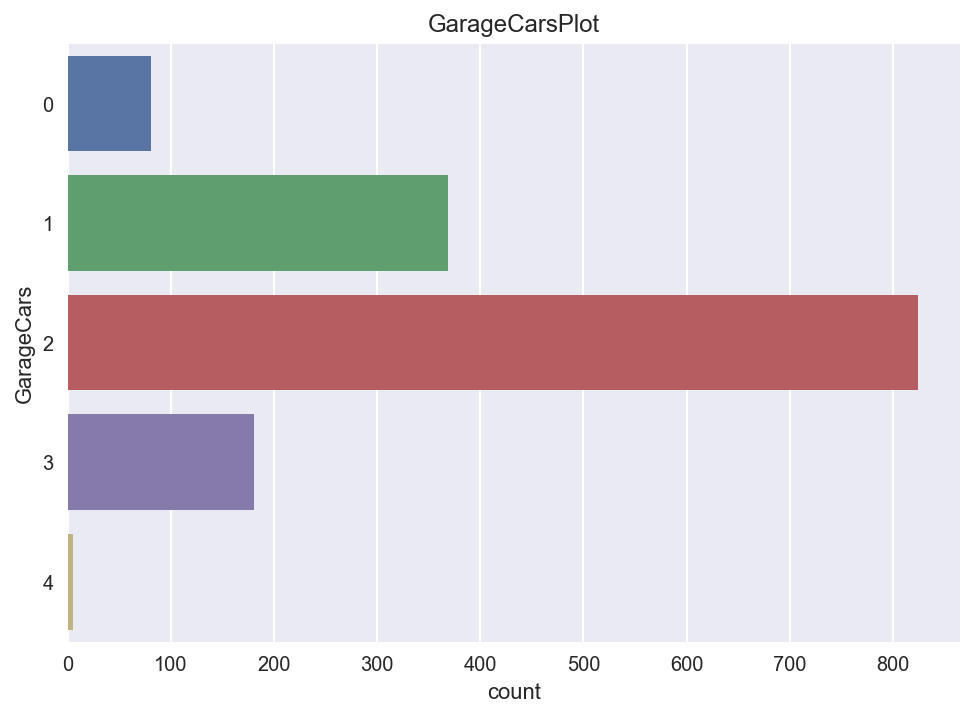

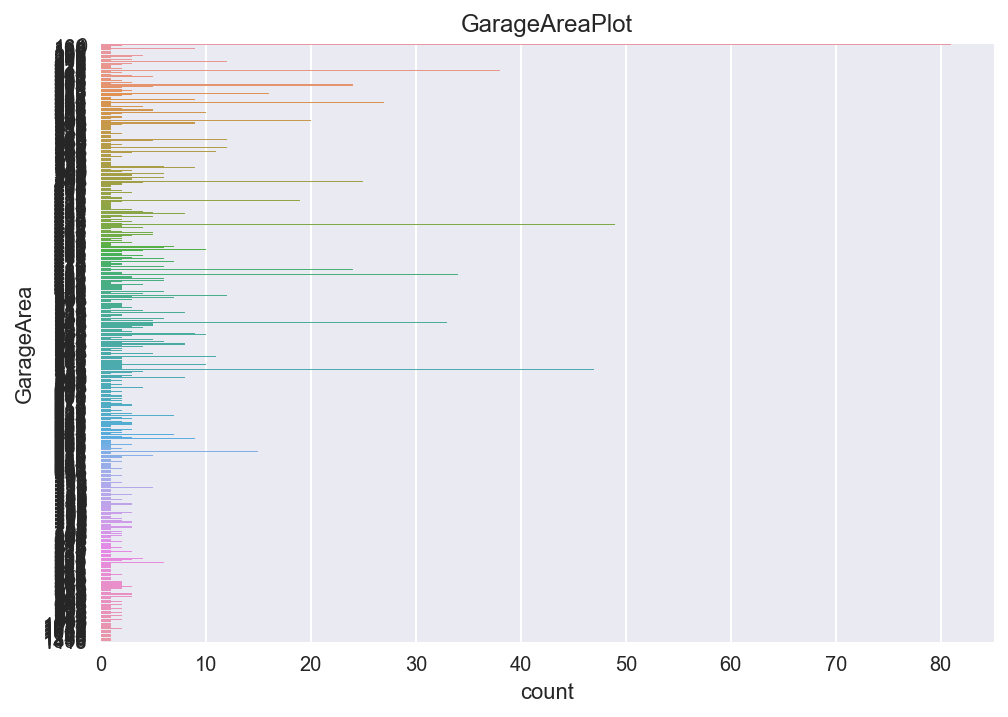

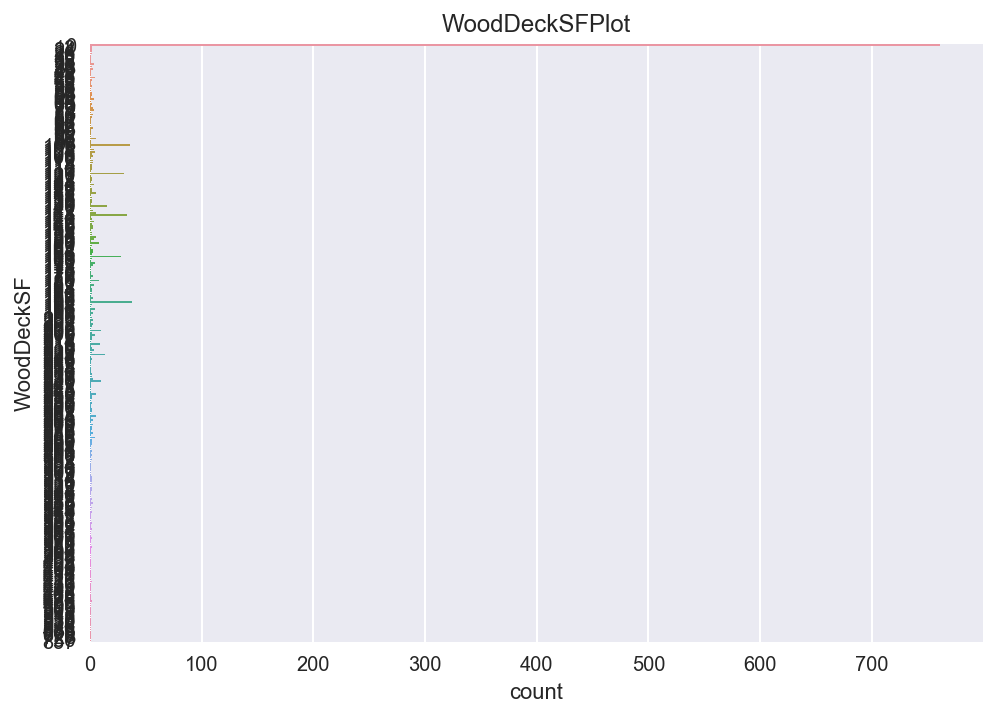

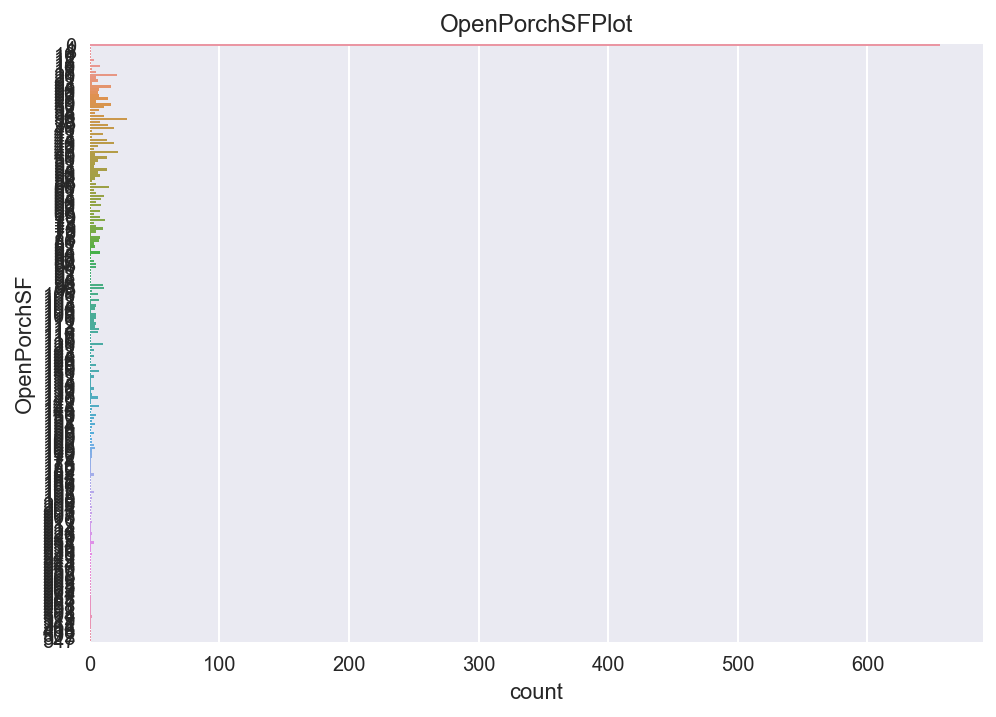

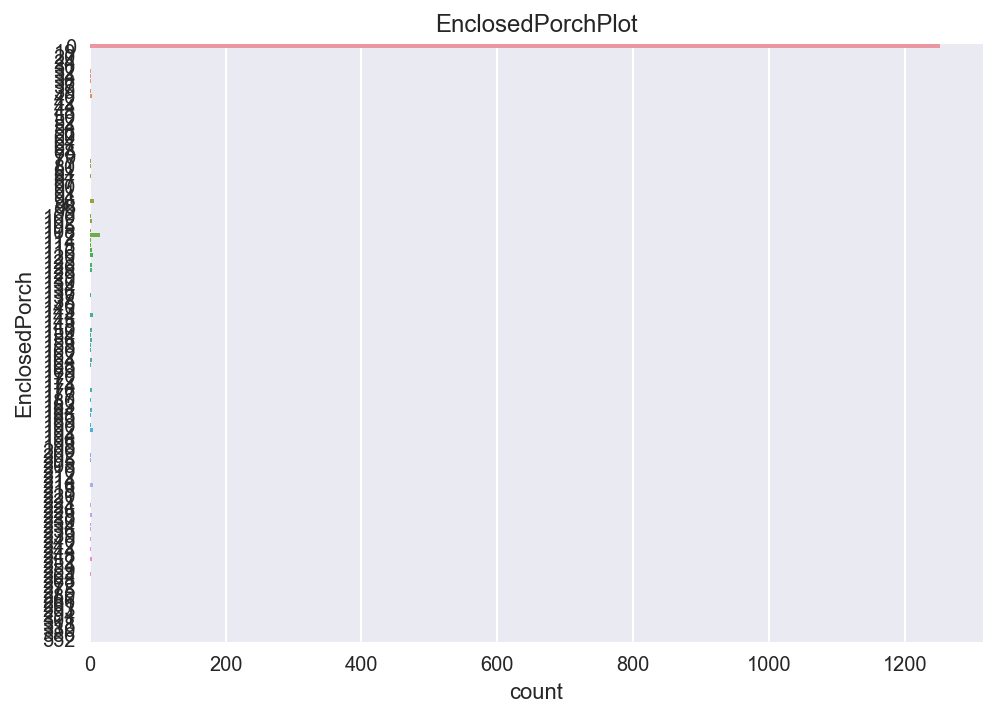

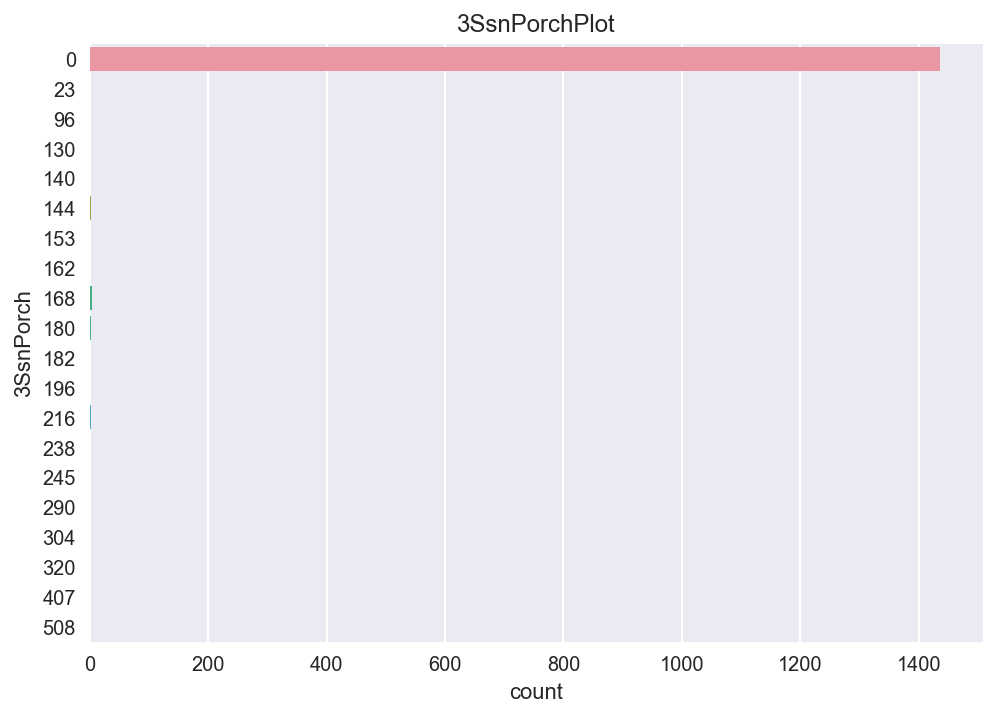

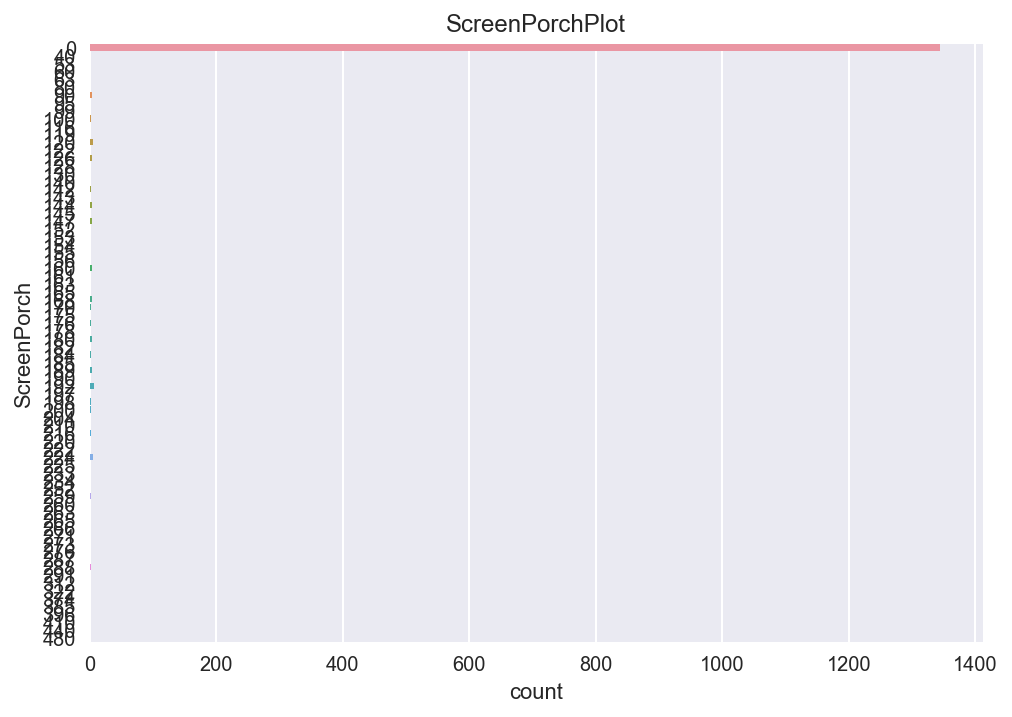

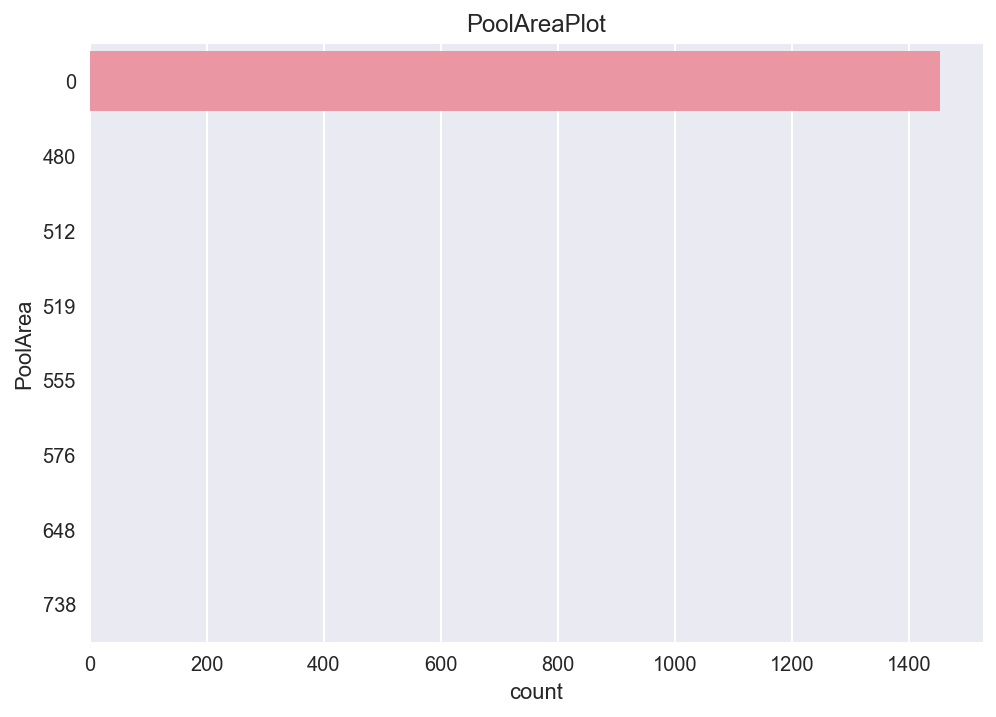

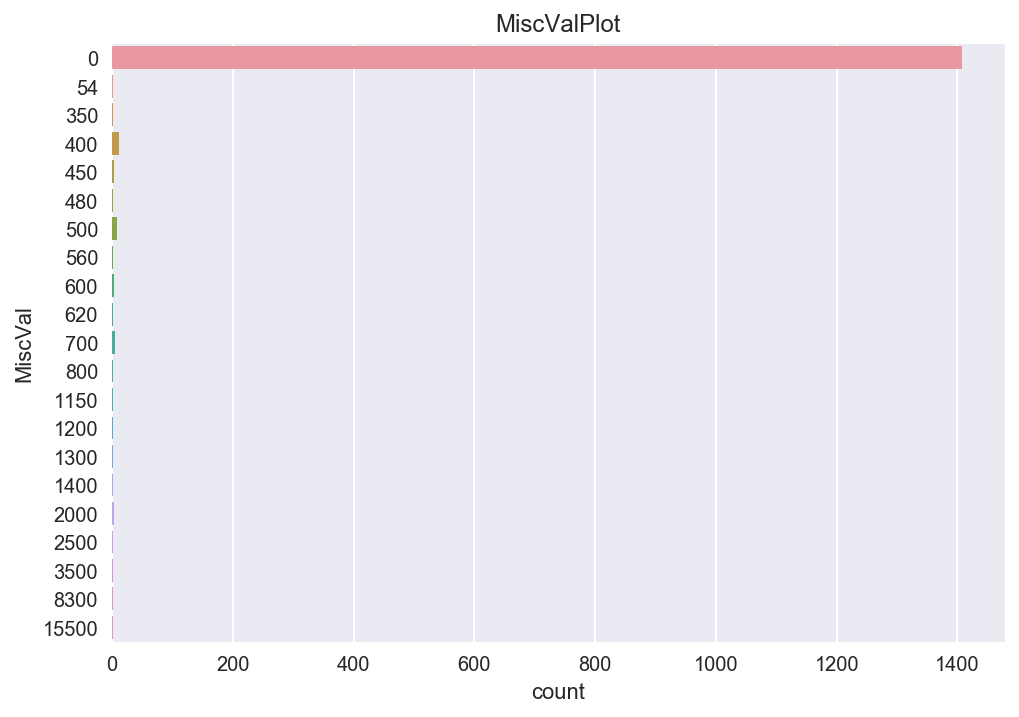

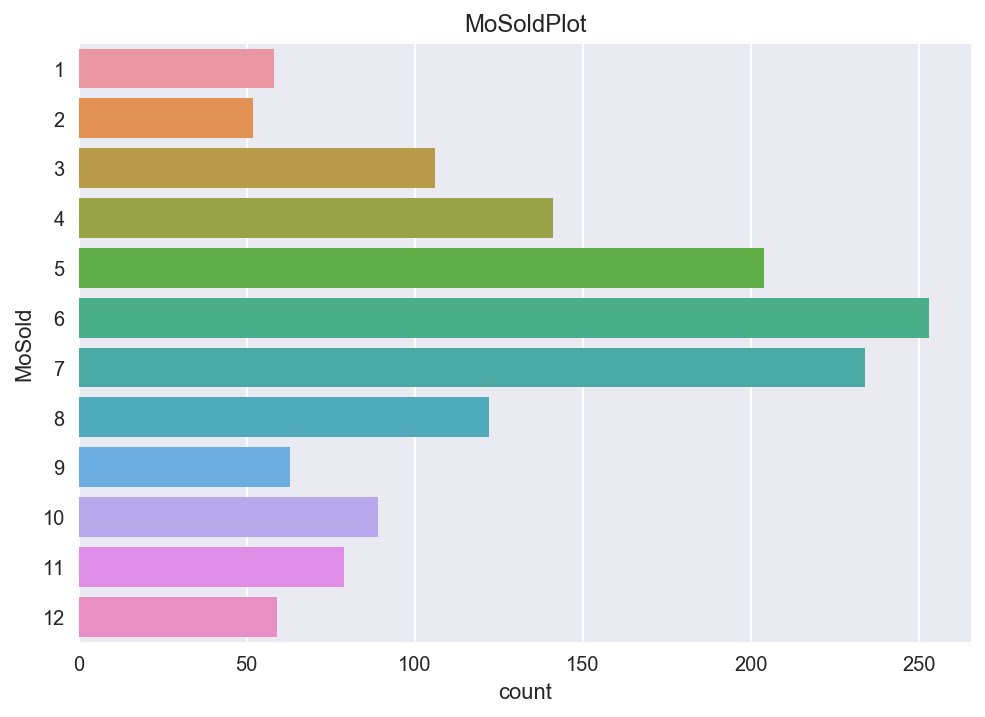

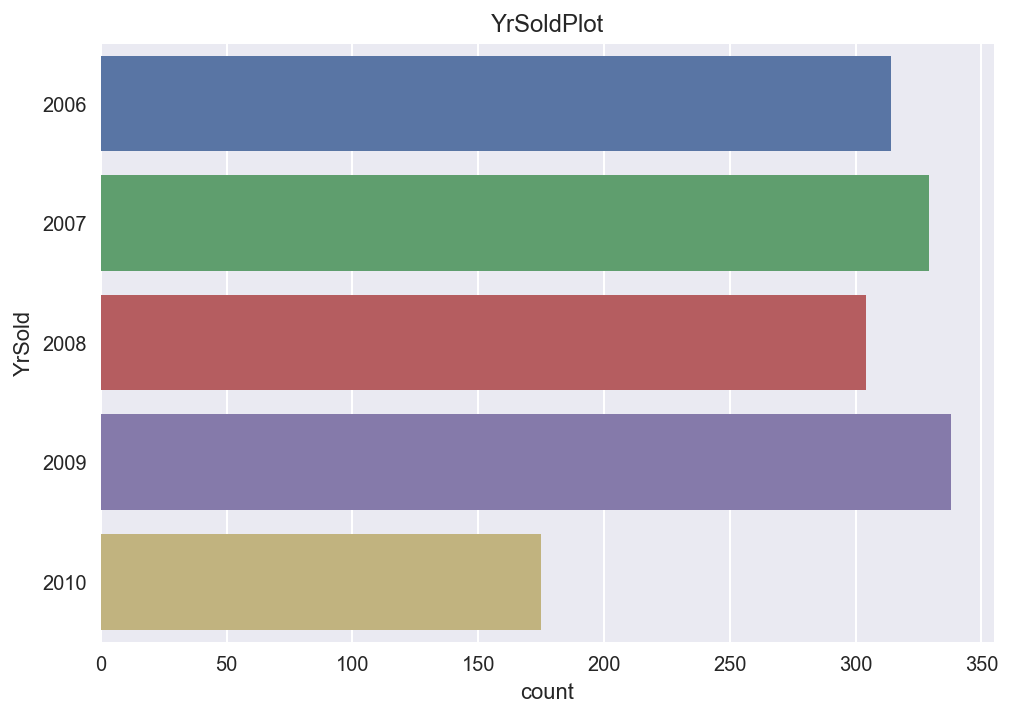

In [12]:
for c in tqdm(quant_features[1:-1]):
    plt.figure()
    plt.title(str(c) + 'Plot')
    sns.countplot(y=train_data[c])

# <center>Cleaning Training and Testing Data</center>
### Checking for Null Vlaues

In [13]:
train_data_cleaned = train_data
test_data_cleaned = test_data
dfs = [train_data_cleaned, test_data_cleaned ]

In [14]:
train_data_cleaned.isnull().sum().sum()

6965

In [15]:
train_data_cleaned[quant_features].isnull().sum().sum()

348

In [16]:
train_data_cleaned[quant_features].isnull().sum().sum()

348

In [17]:
test_data_cleaned.isnull().sum().sum()

7000

In [18]:
test_data[quant_features[:-1]].isnull().sum().sum() #Removing SalePrice with quant_features[:-1] from quant_features list as, salespriece is not in dataframe

330

### Resolving Quantative Null Values

In [19]:
for df in dfs:
    for c in train_data_cleaned[quant_features]:
        train_data_cleaned[c] = train_data_cleaned[c].fillna(train_data_cleaned[c].mean())
    for c in test_data[quant_features[:-1]]:
        test_data_cleaned[c] = test_data_cleaned[c].fillna(test_data_cleaned[c].mean())

In [20]:
print ('Training Data Null Values (Quant): ' + str(train_data_cleaned[quant_features].isnull().sum().sum()))
print ('Test Data Null Values (Quant): ' + str(test_data_cleaned[quant_features[:-1]].isnull().sum().sum()))
print ('Training Data Null Values (All): ' + str(train_data_cleaned.isnull().sum().sum()))
print ('Test Data Null Values (All): ' + str(test_data_cleaned.isnull().sum().sum()))

Training Data Null Values (Quant): 0
Test Data Null Values (Quant): 0
Training Data Null Values (All): 6617
Test Data Null Values (All): 6670


### Categorical Features: Cleaning Nulls Values and Setting Dummies

In [21]:
train_data_cleaned.shape

(1460, 81)

In [22]:
train_data_cleaned.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
416,417,60,RL,74.0,7844,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,7,1978,1978,Hip,CompShg,HdBoard,HdBoard,BrkFace,203.0,TA,TA,CBlock,TA,TA,No,ALQ,209,Unf,0,463,672,GasA,TA,Y,SBrkr,672,728,0,1400,0,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1978.0,Fin,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,149500
184,185,50,RL,92.0,7438,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1.5Fin,5,8,1908,1991,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,Fa,TA,No,Unf,0,Unf,0,504,504,GasA,Gd,Y,SBrkr,936,316,0,1252,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1986.0,Unf,2,576,TA,TA,Y,104,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,127000
568,569,50,RL,79.0,12327,Pave,NaN,IR1,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,1.5Fin,8,8,1983,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1441,Unf,0,55,1496,GasA,Ex,Y,SBrkr,1496,636,0,2132,1,0,1,1,1,1,Gd,5,Min2,1,Gd,BuiltIn,1983.0,Fin,2,612,Gd,TA,Y,349,40,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,316600
517,518,60,RL,79.0,10208,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,921.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1264,1264,GasA,Ex,Y,SBrkr,1277,1067,0,2344,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1996.0,RFn,3,889,TA,TA,Y,220,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,265000
94,95,60,RL,69.0,9337,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,No,GLQ,648,Unf,0,176,824,GasA,Ex,Y,SBrkr,905,881,0,1786,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1997.0,RFn,2,684,TA,TA,Y,0,162,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,204750


In [23]:
for df in dfs:
    for c in df[cat_features]: 
        df[c] = df[c].astype('category')
        df[c] = df[c].cat.codes
#Check: train_data['MSZoning'].unique()
train_data_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,-1,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,-1,-1,-1,0,12,2008,8,4,250000


In [24]:
print ('Training Data Null Values (Quant): ' + str(train_data_cleaned[quant_features].isnull().sum().sum()))
print ('Test Data Null Values (Quant): ' + str(test_data_cleaned[quant_features[:-1]].isnull().sum().sum()))
print ('Training Data Null Values (All): ' + str(train_data_cleaned.isnull().sum().sum()))
print ('Test Data Null Values (All): ' + str(test_data_cleaned.isnull().sum().sum()))

Training Data Null Values (Quant): 0
Test Data Null Values (Quant): 0
Training Data Null Values (All): 0
Test Data Null Values (All): 0


In [25]:
train_data_cleaned.shape, test_data_cleaned.shape

((1460, 81), (1459, 80))

In [26]:
# This was a creative solution on resolving an issue of using pd.dummies() for both df in dfs
 
#additional_test_features = []
#for c in train_dummies:
#    if c not in test_dummies:
#        additional_test_features.append(c)
#
#for c in additional_test_features:
#    test_dummies[c] = 0

In [27]:
test_data_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,-1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,-1,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,-1,2,-1,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,-1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,-1,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,-1,-1,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,-1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,-1,2,-1,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,-1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,-1,-1,-1,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,-1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,-1,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,-1,-1,-1,0,1,2010,8,4


### Converting DataFrame to Numpy Array

In [28]:
train_data_cleaned.shape[1], test_data_cleaned.shape[1]

(81, 80)

In [29]:
X_features = train_data_cleaned.columns[:-1]
X = train_data_cleaned[X_features].values

y = train_data_cleaned['SalePrice'].values

print('Length of Traning Values: ' + str((len(X))))
print('Lenth of Target Values: '+ str(len(y)) + '\n')

Length of Traning Values: 1460
Lenth of Target Values: 1460



In [30]:
X_test = test_data_cleaned[X_features].values
X_test
print('Length of Traning Values: ' + str((len(X_test))))

Length of Traning Values: 1459


# <center>Principal Component Analysis of Features</center>

In [31]:
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=1, random_state=101).fit(X)

In [32]:
pd.DataFrame(factor.components_, columns=X_features).transpose()

,0
Id,-1.40e+01
MSSubClass,-5.91e+00
MSZoning,-2.18e-02
LotFrontage,6.75e+00
LotArea,9.98e+03
Street,-1.26e-02
Alley,-3.11e-02
LotShape,-2.33e-01
LandContour,-1.05e-01
Utilities,2.65e-04


# <center>Training Models</center> 
### Training the Regression Models

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(normalize=True)
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [34]:
from sklearn.neighbors import KNeighborsRegressor
KNNregressor = KNeighborsRegressor(n_neighbors=10)
KNNregressor.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [35]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(max_depth=10)
DTregressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators= 300, random_state=1)
RFregressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### Model Cross-Validation Score

In [ ]:
#models = [RFregressor]
models = [regression, KNNregressor, DTregressor, RFregressor]

In [ ]:
from sklearn.cross_validation import cross_val_score
CV_scores = pd.DataFrame(data=[], columns =['Model', 'Cross Validation Score'])
for model in tqdm(models):
    scores = cross_val_score(model, X, y, cv=20, scoring='neg_mean_squared_error')
    mean_score = np.mean(np.abs(scores))
    df_scores = pd.DataFrame([[str(model), mean_score]], columns=['Model', 'Cross Validation Score'])
    CV_scores = CV_scores.append(df_scores, ignore_index=True)
    print( str(model) + ' complete')
CV_scores

/Users/Kavi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
 50%|█████     | 2/4 [00:00<00:00,  2.83it/s]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True) complete
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform') complete


 75%|███████▌  | 3/4 [00:01<00:00,  2.63it/s]

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') complete


### Visualization Model Error on Train Set

In [ ]:
(train_data['SalePrice'] - pd.Series(regression.predict(X))).plot()

In [ ]:
train_data['SalePrice'].head()

# <center>Predicting and Submitting Results</center>

In [ ]:
submission_ids = pd.DataFrame(pd.Series(test_data['Id']))
submission_sales = pd.DataFrame(pd.Series(regression.predict(X_test), name='SalePrice'))
submission = pd.concat([submission_ids,submission_sales], axis =1, join='outer') 
submission.set_index(submission['Id'], drop=False, inplace=True)
submission.drop('Id', inplace=True, axis=1)
submission.shape

In [ ]:
# Fixing about 20 negative entries
submission[submission['SalePrice'] < 0] = 0

In [ ]:
submission.sample(20)

In [ ]:
submission.to_csv('Submissions/housesubmissions.csv', sep=',')

Author: Kavi Sekhon